# Russian Wholesale Electricity Market

## Context

On 1st September 2006, the Wholesale Electricity and Capacity Market was launched in Russia. The nodal pricing system is applied to the wholesale market: each node gets an individual price value for a certain hour. For the price analysis and forecast problem, the analyst uses the weighted average of the nodal prices for certain territory such as price zone, united energy system and others. More details about the Wholesale Electricity and Capacity Market of Russia you will find in my latest paper The Three-Headed Dragon: Electricity, Trading, Analysis.﻿

## Content

The data files include

* the weighted average of the nodal day ahead prices for the European and Siberian price zones of the market;
* the weighted average of the nodal day ahead prices for six United Energy Systems: NorthWest, Centre, Ural, South, Middle Volga and Siberia;
* the day ahead scheduled volume for the European and Siberian price zones;
* the weighted average of the nodal intraday prices for three United Energy Systems: NorthWest, Centre and Siberia

Time stamps are in Europe/Moscow timezone.

For more details, please see [The Three-Headed Dragon: Electricity, Trading, Analysis](https://www.mbureau.energy/articles/three-headed-dragon-electricity-trading-analysis-first-head-electricity).

## CHALLENGES
Electricity is a commodity capable of being bought, sold, and traded. All nations are moving towards a
Deregulated Electricity Market System where the competitors are allowed to buy and sell electricity by
permitting market participants to invest in power plants and transmission lines. Also, it offers a broader
range of renewable energy options - the need of the hour.
This system has paved the way for Data Scientists/ Machine Learning Engineers to extensively participate in
the growing dynamic energy management systems. The spectrum includes predicting energy requirements,
prices, network grid analysis, etc.

## PROJECT DESCRIPTION: WHOLESALE ELECTRICITY MARKET DATASET
Addressing the high demand for power, on the 1st of September 2006, the Wholesale Electricity and
Capacity Market was launched in Russia. Now, both the price and electricity consumption forecast problem
is highly important on the Wholesale Electricity Market. Thus, the questions:

* What price should we expect tomorrow, next week, next year?
* What electricity consumption should we expect tomorrow, next week, next year?

It is important to employ analysts, ML Engineers, and Data Scientists to extract patterns from data to derive
insights that could help different aspects of the operation.

Reference : https://machinelearningmastery.com/autoregression-models-time-series-forecasting-python/

# Exploratory Data Analysis

In [150]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import os

sns.set()
pd.set_option('display.max_rows', None) 

In [151]:
#fetch files from directory
pathcwd = os.getcwd()
path = pathcwd + "/Project data/Russian Electricity Data 2006"
files = glob.glob(path + "/*.csv")
files

['/Users/user/Documents/Data Science/Hamoye/Project data/Russian Electricity Data 2006/RU_Electricity_Market_UES_intraday_price.csv',
 '/Users/user/Documents/Data Science/Hamoye/Project data/Russian Electricity Data 2006/RU_Electricity_Market_PZ_dayahead_price_volume.csv',
 '/Users/user/Documents/Data Science/Hamoye/Project data/Russian Electricity Data 2006/RU_Electricity_Market_UES_dayahead_price.csv']

In [152]:
for file in files:
    print(file)

/Users/user/Documents/Data Science/Hamoye/Project data/Russian Electricity Data 2006/RU_Electricity_Market_UES_intraday_price.csv
/Users/user/Documents/Data Science/Hamoye/Project data/Russian Electricity Data 2006/RU_Electricity_Market_PZ_dayahead_price_volume.csv
/Users/user/Documents/Data Science/Hamoye/Project data/Russian Electricity Data 2006/RU_Electricity_Market_UES_dayahead_price.csv


In [153]:
UES_intraday_price = pd.read_csv(files[0])
PZ_dayahead_price_volume = pd.read_csv(files[1])
UES_dayahead_price = pd.read_csv(files[2])
UES_intraday_price.head()


timestep  UES_Northwest  UES_Siberia  UES_Center
0  2017-01-01 00:00            767          918         982
1  2017-01-01 01:00            675          889         848
2  2017-01-01 02:00            717          933         920
3  2017-01-01 03:00            683          947         885
4  2017-01-01 04:00            633          934         829

In [5]:
def data_details(data):
    head = data.head()
    info = data.info()
    describe = data.describe()
    any_null = data.isnull().any()
    
    return (print(head),
                  print(info), 
                  print(describe),
                  print(any_null))

In [6]:
data_details(UES_intraday_price)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24072 entries, 0 to 24071
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   timestep       24072 non-null  object
 1   UES_Northwest  24072 non-null  int64 
 2   UES_Siberia    24072 non-null  int64 
 3   UES_Center     24072 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 752.4+ KB
           timestep  UES_Northwest  UES_Siberia  UES_Center
0  2017-01-01 00:00            767          918         982
1  2017-01-01 01:00            675          889         848
2  2017-01-01 02:00            717          933         920
3  2017-01-01 03:00            683          947         885
4  2017-01-01 04:00            633          934         829
None
       UES_Northwest   UES_Siberia    UES_Center
count   24072.000000  24072.000000  24072.000000
mean      990.692921    794.586200   1210.754944
std       316.709637    259.351579    356.775935
min         0.000000 

(None, None, None, None)

## 0 Minimum Values ????
Notice that the minimum values for all three regions is Zero (0). Since we are talking about prices it is mostly unlikely that there are hours/periods where electricity is free. So we assume these are errors.

Or does that mean there was no power supply within those hours?? THEM DEY TAKE LIGHT FOR RUSSIA??????

Let's count the number of Zero values in each region.


After some research, I found that: 

`"If a consumer leaves the price cells empty, it declares its intention to buy electricity at any market price. This type of bid is called a price independent bid. Such bids reflect inelastic demand, as discussed earlier. In 2017 in Russia 99.5% of bids were price independent."`

This explains why there are lots of zero values, especially in 2017

In [7]:
count = 0
count1 = 0
count2 = 0
for row, i in UES_intraday_price.iterrows():
    if i[1] == 0:
        count += 1
    if i[2] == 0:
        count1 += 1
    if i[3] == 0:
        count2 += 1
print (f"There are {count} - 0 values in UES_Northwest")
print (f"There are {count1} - 0 values in UES_Siberia")
print (f"There are {count2} - 0 values in UES_Center")

There are 63 - 0 values in UES_Northwest
There are 642 - 0 values in UES_Siberia
There are 73 - 0 values in UES_Center


In [8]:
# print timestamp of each zero values

for row, i in UES_intraday_price.iterrows():
    if i[1] == 0:
        print (i)
    

timestep         2017-01-26 00:00
UES_Northwest                   0
UES_Siberia                   309
UES_Center                      0
Name: 600, dtype: object
timestep         2017-01-26 01:00
UES_Northwest                   0
UES_Siberia                   318
UES_Center                      1
Name: 601, dtype: object
timestep         2017-04-16 23:00
UES_Northwest                   0
UES_Siberia                     0
UES_Center                      1
Name: 2543, dtype: object
timestep         2017-04-21 01:00
UES_Northwest                   0
UES_Siberia                   304
UES_Center                      0
Name: 2641, dtype: object
timestep         2017-04-28 02:00
UES_Northwest                   0
UES_Siberia                   381
UES_Center                      0
Name: 2810, dtype: object
timestep         2017-05-01 03:00
UES_Northwest                   0
UES_Siberia                   381
UES_Center                      0
Name: 2883, dtype: object
timestep         2017-05-03 04

timestep         2018-11-18 02:00
UES_Northwest                   0
UES_Siberia                   833
UES_Center                    540
Name: 16466, dtype: object
timestep         2018-11-18 03:00
UES_Northwest                   0
UES_Siberia                   834
UES_Center                    538
Name: 16467, dtype: object
timestep         2019-05-12 04:00
UES_Northwest                   0
UES_Siberia                  1032
UES_Center                      0
Name: 20668, dtype: object
timestep         2019-07-02 23:00
UES_Northwest                   0
UES_Siberia                     0
UES_Center                      3
Name: 21911, dtype: object
timestep         2019-08-26 03:00
UES_Northwest                   0
UES_Siberia                   227
UES_Center                      0
Name: 23211, dtype: object
timestep         2019-09-10 02:00
UES_Northwest                   0
UES_Siberia                   117
UES_Center                      0
Name: 23570, dtype: object
timestep         2019-

In [9]:

for row, i in UES_intraday_price.iterrows():
    if i[2] == 0:
        print (i)

timestep         2017-01-11 23:00
UES_Northwest                 248
UES_Siberia                     0
UES_Center                    301
Name: 263, dtype: object
timestep         2017-01-16 22:00
UES_Northwest                   4
UES_Siberia                     0
UES_Center                      4
Name: 382, dtype: object
timestep         2017-01-16 23:00
UES_Northwest                   4
UES_Siberia                     0
UES_Center                      5
Name: 383, dtype: object
timestep         2017-01-17 23:00
UES_Northwest                   1
UES_Siberia                     0
UES_Center                      2
Name: 407, dtype: object
timestep         2017-01-23 22:00
UES_Northwest                   2
UES_Siberia                     0
UES_Center                      2
Name: 550, dtype: object
timestep         2017-01-23 23:00
UES_Northwest                  16
UES_Siberia                     0
UES_Center                     21
Name: 551, dtype: object
timestep         2017-01-24 22:00


timestep         2017-03-31 22:00
UES_Northwest                 405
UES_Siberia                     0
UES_Center                    505
Name: 2158, dtype: object
timestep         2017-03-31 23:00
UES_Northwest                  45
UES_Siberia                     0
UES_Center                     35
Name: 2159, dtype: object
timestep         2017-04-01 18:00
UES_Northwest                1134
UES_Siberia                     0
UES_Center                   1226
Name: 2178, dtype: object
timestep         2017-04-01 20:00
UES_Northwest                1131
UES_Siberia                     0
UES_Center                   1209
Name: 2180, dtype: object
timestep         2017-04-01 21:00
UES_Northwest                 952
UES_Siberia                     0
UES_Center                   1018
Name: 2181, dtype: object
timestep         2017-04-01 22:00
UES_Northwest                 901
UES_Siberia                     0
UES_Center                    952
Name: 2182, dtype: object
timestep         2017-04-01 

Name: 3601, dtype: object
timestep         2017-05-31 20:00
UES_Northwest                1336
UES_Siberia                     0
UES_Center                   1521
Name: 3620, dtype: object
timestep         2017-05-31 21:00
UES_Northwest                1303
UES_Siberia                     0
UES_Center                   1614
Name: 3621, dtype: object
timestep         2017-05-31 22:00
UES_Northwest                1220
UES_Siberia                     0
UES_Center                   1304
Name: 3622, dtype: object
timestep         2017-05-31 23:00
UES_Northwest                 760
UES_Siberia                     0
UES_Center                    799
Name: 3623, dtype: object
timestep         2017-06-01 23:00
UES_Northwest                 749
UES_Siberia                     0
UES_Center                    788
Name: 3647, dtype: object
timestep         2017-06-02 00:00
UES_Northwest                 790
UES_Siberia                     0
UES_Center                    839
Name: 3648, dtype: object
ti

Name: 4485, dtype: object
timestep         2017-07-06 23:00
UES_Northwest                 487
UES_Siberia                     0
UES_Center                    296
Name: 4487, dtype: object
timestep         2017-07-07 23:00
UES_Northwest                 654
UES_Siberia                     0
UES_Center                    582
Name: 4511, dtype: object
timestep         2017-07-09 22:00
UES_Northwest                 742
UES_Siberia                     0
UES_Center                    964
Name: 4558, dtype: object
timestep         2017-07-10 22:00
UES_Northwest                 733
UES_Siberia                     0
UES_Center                    878
Name: 4582, dtype: object
timestep         2017-07-10 23:00
UES_Northwest                 447
UES_Siberia                     0
UES_Center                    550
Name: 4583, dtype: object
timestep         2017-07-12 00:00
UES_Northwest                 357
UES_Siberia                     0
UES_Center                    543
Name: 4608, dtype: object
ti

timestep         2017-12-18 23:00
UES_Northwest                   4
UES_Siberia                     0
UES_Center                      5
Name: 8447, dtype: object
timestep         2017-12-23 23:00
UES_Northwest                   4
UES_Siberia                     0
UES_Center                      6
Name: 8567, dtype: object
timestep         2018-01-16 22:00
UES_Northwest                 793
UES_Siberia                     0
UES_Center                   1050
Name: 9142, dtype: object
timestep         2018-01-16 23:00
UES_Northwest                 867
UES_Siberia                     0
UES_Center                    989
Name: 9143, dtype: object
timestep         2018-03-28 21:00
UES_Northwest                1030
UES_Siberia                     0
UES_Center                   1185
Name: 10845, dtype: object
timestep         2018-04-09 21:00
UES_Northwest                 920
UES_Siberia                     0
UES_Center                   1026
Name: 11133, dtype: object
timestep         2018-04-0

timestep         2018-06-12 10:00
UES_Northwest                 853
UES_Siberia                     0
UES_Center                    971
Name: 12658, dtype: object
timestep         2018-06-12 19:00
UES_Northwest                1039
UES_Siberia                     0
UES_Center                   1165
Name: 12667, dtype: object
timestep         2018-06-12 23:00
UES_Northwest                 625
UES_Siberia                     0
UES_Center                    691
Name: 12671, dtype: object
timestep         2018-06-13 20:00
UES_Northwest                 465
UES_Siberia                     0
UES_Center                    470
Name: 12692, dtype: object
timestep         2018-06-13 23:00
UES_Northwest                 493
UES_Siberia                     0
UES_Center                    563
Name: 12695, dtype: object
timestep         2018-06-14 21:00
UES_Northwest                 740
UES_Siberia                     0
UES_Center                   1040
Name: 12717, dtype: object
timestep         2018-

Name: 13728, dtype: object
timestep         2018-07-27 15:00
UES_Northwest                1483
UES_Siberia                     0
UES_Center                   1714
Name: 13743, dtype: object
timestep         2018-07-27 16:00
UES_Northwest                1508
UES_Siberia                     0
UES_Center                   1716
Name: 13744, dtype: object
timestep         2018-07-28 00:00
UES_Northwest                1120
UES_Siberia                     0
UES_Center                   1411
Name: 13752, dtype: object
timestep         2018-07-28 01:00
UES_Northwest                 940
UES_Siberia                     0
UES_Center                   1156
Name: 13753, dtype: object
timestep         2018-07-28 02:00
UES_Northwest                 896
UES_Siberia                     0
UES_Center                   1092
Name: 13754, dtype: object
timestep         2018-07-28 03:00
UES_Northwest                 737
UES_Siberia                     0
UES_Center                    900
Name: 13755, dtype: ob

Name: 14204, dtype: object
timestep         2018-08-15 21:00
UES_Northwest                 980
UES_Siberia                     0
UES_Center                   1393
Name: 14205, dtype: object
timestep         2018-08-15 23:00
UES_Northwest                 815
UES_Siberia                     0
UES_Center                    955
Name: 14207, dtype: object
timestep         2018-08-16 00:00
UES_Northwest                 711
UES_Siberia                     0
UES_Center                    824
Name: 14208, dtype: object
timestep         2018-08-16 01:00
UES_Northwest                 594
UES_Siberia                     0
UES_Center                    696
Name: 14209, dtype: object
timestep         2018-08-16 21:00
UES_Northwest                 868
UES_Siberia                     0
UES_Center                   1211
Name: 14229, dtype: object
timestep         2018-08-16 22:00
UES_Northwest                 911
UES_Siberia                     0
UES_Center                   1088
Name: 14230, dtype: ob

timestep         2018-10-28 23:00
UES_Northwest                 737
UES_Siberia                     0
UES_Center                    839
Name: 15983, dtype: object
timestep         2018-10-30 23:00
UES_Northwest                 941
UES_Siberia                     0
UES_Center                   1054
Name: 16031, dtype: object
timestep         2018-11-01 22:00
UES_Northwest                 985
UES_Siberia                     0
UES_Center                   1026
Name: 16078, dtype: object
timestep         2018-11-02 01:00
UES_Northwest                 734
UES_Siberia                     0
UES_Center                    815
Name: 16081, dtype: object
timestep         2018-11-07 21:00
UES_Northwest                 981
UES_Siberia                     0
UES_Center                   1174
Name: 16221, dtype: object
timestep         2018-11-11 20:00
UES_Northwest                1007
UES_Siberia                     0
UES_Center                   1168
Name: 16316, dtype: object
timestep         2018-

timestep         2019-08-03 21:00
UES_Northwest                1353
UES_Siberia                     0
UES_Center                   1497
Name: 22677, dtype: object
timestep         2019-08-06 21:00
UES_Northwest                 189
UES_Siberia                     0
UES_Center                   1509
Name: 22749, dtype: object
timestep         2019-08-06 22:00
UES_Northwest                 150
UES_Siberia                     0
UES_Center                   1305
Name: 22750, dtype: object
timestep         2019-08-08 23:00
UES_Northwest                 654
UES_Siberia                     0
UES_Center                    837
Name: 22799, dtype: object
timestep         2019-08-21 22:00
UES_Northwest                1105
UES_Siberia                     0
UES_Center                   1217
Name: 23110, dtype: object
timestep         2019-08-21 23:00
UES_Northwest                 974
UES_Siberia                     0
UES_Center                   1063
Name: 23111, dtype: object
timestep         2019-

# OBSERVATION

Observation of these values shows there are really low price values in all three regions, as low as 0 through 10.
this could mean that only equivalent supply of electricity was provided, so I assume 0 means lack of electricity.

There's no enough information on the data at the moment.

In [10]:
data_details(PZ_dayahead_price_volume)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45816 entries, 0 to 45815
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   timestep         45816 non-null  object 
 1   consumption_eur  45816 non-null  float64
 2   consumption_sib  45816 non-null  float64
 3   price_eur        45816 non-null  float64
 4   price_sib        45816 non-null  float64
dtypes: float64(4), object(1)
memory usage: 1.7+ MB
           timestep  consumption_eur  consumption_sib  price_eur  price_sib
0  2006-09-01 00:00          62341.0          17916.0     275.22        0.0
1  2006-09-01 01:00          60625.0          17467.0       0.00        0.0
2  2006-09-01 02:00          59685.0          17161.0       0.00        0.0
3  2006-09-01 03:00          59500.0          17061.0       0.00        0.0
4  2006-09-01 04:00          60617.0          17074.0       0.00        0.0
None
       consumption_eur  consumption_sib     price_eur    

(None, None, None, None)

In [11]:
data_details(UES_dayahead_price)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23952 entries, 0 to 23951
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   timestep          23952 non-null  object 
 1   UES_Northwest     23952 non-null  float64
 2   UES_Siberia       23952 non-null  float64
 3   UES_Middle_Volga  23952 non-null  float64
 4   UES_Urals         23952 non-null  float64
 5   UES_Center        23952 non-null  float64
 6   UES_South         23952 non-null  float64
dtypes: float64(6), object(1)
memory usage: 1.3+ MB
           timestep  UES_Northwest  UES_Siberia  UES_Middle_Volga  UES_Urals  \
0  2017-01-01 00:00         964.67      1006.27           1032.80     953.23   
1  2017-01-01 01:00         984.79      1003.79           1033.34     946.79   
2  2017-01-01 02:00         962.54      1005.09           1029.51     944.35   
3  2017-01-01 03:00         888.44      1002.38            976.34     906.15   
4  2017-01-01 04:

(None, None, None, None)

### Drop Zero Values



In [12]:
#write function to drop values below 50.0
#1. Convert timestep to datetime data type

def drop_vals(data):
    pd.to_datetime(data["timestep"])
    data.index = data["timestep"]
    data = data.drop("timestep", axis = 1)
    
    #2. replace all values between 0 & 50 with Nan
    
    data[(data >= 0.0) & (data <= 50.0)] = np.nan
    
    #3. drop all NaN values by row
    
    data = data.dropna(axis = 0)
    return data
    

In [13]:
UES_intraday_price = drop_vals(UES_intraday_price)
UES_intraday_price.head()

UES_Northwest  UES_Siberia  UES_Center
timestep                                                
2017-01-01 00:00          767.0        918.0       982.0
2017-01-01 01:00          675.0        889.0       848.0
2017-01-01 02:00          717.0        933.0       920.0
2017-01-01 03:00          683.0        947.0       885.0
2017-01-01 04:00          633.0        934.0       829.0

In [14]:
UES_intraday_price.describe()

UES_Northwest   UES_Siberia    UES_Center
count   23087.000000  23087.000000  23087.000000
mean     1005.976047    824.779443   1229.181877
std       299.950718    213.810783    333.598849
min        54.000000     51.000000     53.000000
25%       805.000000    726.000000    982.000000
50%      1000.000000    865.000000   1236.000000
75%      1206.000000    969.000000   1483.000000
max      6707.000000   1527.000000   6845.000000

In [15]:
UES_intraday_price.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23087 entries, 2017-01-01 00:00 to 2019-09-30 22:00
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   UES_Northwest  23087 non-null  float64
 1   UES_Siberia    23087 non-null  float64
 2   UES_Center     23087 non-null  float64
dtypes: float64(3)
memory usage: 721.5+ KB


In [16]:
PZ_dayahead_price_volume = drop_vals(PZ_dayahead_price_volume)
PZ_dayahead_price_volume.head()

consumption_eur  consumption_sib  price_eur  price_sib
timestep                                                                
2006-09-03 21:00          70250.0          19531.0     514.92     276.99
2006-09-03 22:00          66733.0          19397.0     375.61     242.27
2006-09-05 16:00          72688.0          19364.0     503.68     255.55
2006-09-05 17:00          71822.0          19336.0     481.50     267.84
2006-09-05 18:00          71933.0          19410.0     475.10     272.73

In [17]:
PZ_dayahead_price_volume.describe()

consumption_eur  consumption_sib     price_eur     price_sib
count     41919.000000     41919.000000  41919.000000  41919.000000
mean      82661.575606     22387.037535    757.891342    469.286830
std       11141.969289      3073.767901    226.715960    111.910013
min       58817.941400     15750.231440     50.260000     50.030000
25%       74369.933590     19724.709960    596.080000    412.605000
50%       81473.000000     22153.000000    736.930000    480.740000
75%       90961.500000     24976.005855    922.875000    540.305000
max      111722.984400     30666.000000   2135.010000   1029.690000

In [18]:
PZ_dayahead_price_volume.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41919 entries, 2006-09-03 21:00 to 2011-11-22 23:00
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   consumption_eur  41919 non-null  float64
 1   consumption_sib  41919 non-null  float64
 2   price_eur        41919 non-null  float64
 3   price_sib        41919 non-null  float64
dtypes: float64(4)
memory usage: 1.6+ MB


In [19]:
UES_dayahead_price = drop_vals(UES_dayahead_price)
UES_dayahead_price.head()

UES_Northwest  UES_Siberia  UES_Middle_Volga  UES_Urals  \
timestep                                                                    
2017-01-01 00:00         964.67      1006.27           1032.80     953.23   
2017-01-01 01:00         984.79      1003.79           1033.34     946.79   
2017-01-01 02:00         962.54      1005.09           1029.51     944.35   
2017-01-01 03:00         888.44      1002.38            976.34     906.15   
2017-01-01 04:00         847.10      1002.58            945.28     894.08   

                  UES_Center  UES_South  
timestep                                 
2017-01-01 00:00     1050.17    1706.30  
2017-01-01 01:00     1051.15    1592.17  
2017-01-01 02:00     1039.84    1561.85  
2017-01-01 03:00      977.04    1534.37  
2017-01-01 04:00      938.27    1517.58

In [20]:
UES_dayahead_price.describe()

UES_Northwest   UES_Siberia  UES_Middle_Volga     UES_Urals  \
count   23843.000000  23843.000000      23843.000000  23843.000000   
mean     1157.307762    885.032373       1251.548408   1066.361367   
std       259.627655    147.448137        249.676549    158.252028   
min        75.560000     50.440000         84.020000     92.960000   
25%       943.300000    812.790000       1034.490000    942.005000   
50%      1207.600000    907.340000       1317.340000   1080.480000   
75%      1355.160000    983.900000       1440.765000   1183.890000   
max      2488.860000   1229.400000       1822.970000   1518.630000   

         UES_Center     UES_South  
count  23843.000000  23843.000000  
mean    1321.430512   1500.615355  
std      287.496510    356.953308  
min       77.680000     53.650000  
25%     1059.695000   1253.980000  
50%     1401.910000   1606.320000  
75%     1552.630000   1752.620000  
max     2687.760000   5039.830000

In [21]:
UES_dayahead_price.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23843 entries, 2017-01-01 00:00 to 2019-09-25 23:00
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   UES_Northwest     23843 non-null  float64
 1   UES_Siberia       23843 non-null  float64
 2   UES_Middle_Volga  23843 non-null  float64
 3   UES_Urals         23843 non-null  float64
 4   UES_Center        23843 non-null  float64
 5   UES_South         23843 non-null  float64
dtypes: float64(6)
memory usage: 1.3+ MB


### Moving On!


# Visualization

In [154]:
dayahead_price = PZ_dayahead_price_volume
dayahead_price.head()

timestep  consumption_eur  consumption_sib  price_eur  price_sib
0  2006-09-01 00:00          62341.0          17916.0     275.22        0.0
1  2006-09-01 01:00          60625.0          17467.0       0.00        0.0
2  2006-09-01 02:00          59685.0          17161.0       0.00        0.0
3  2006-09-01 03:00          59500.0          17061.0       0.00        0.0
4  2006-09-01 04:00          60617.0          17074.0       0.00        0.0

In [23]:
"""dayahead_price["datetime"] = pd.to_datetime(dayahead_price["timestep"])
dayahead_price.drop("timestep", axis = 1, inplace = True)
dayahead_price.set_index(["datetime"], drop = True, inplace = True)
dayahead_price.head()"""

'dayahead_price["datetime"] = pd.to_datetime(dayahead_price["timestep"])\ndayahead_price.drop("timestep", axis = 1, inplace = True)\ndayahead_price.set_index(["datetime"], drop = True, inplace = True)\ndayahead_price.head()'

Text(0, 0.5, 'price_sib')

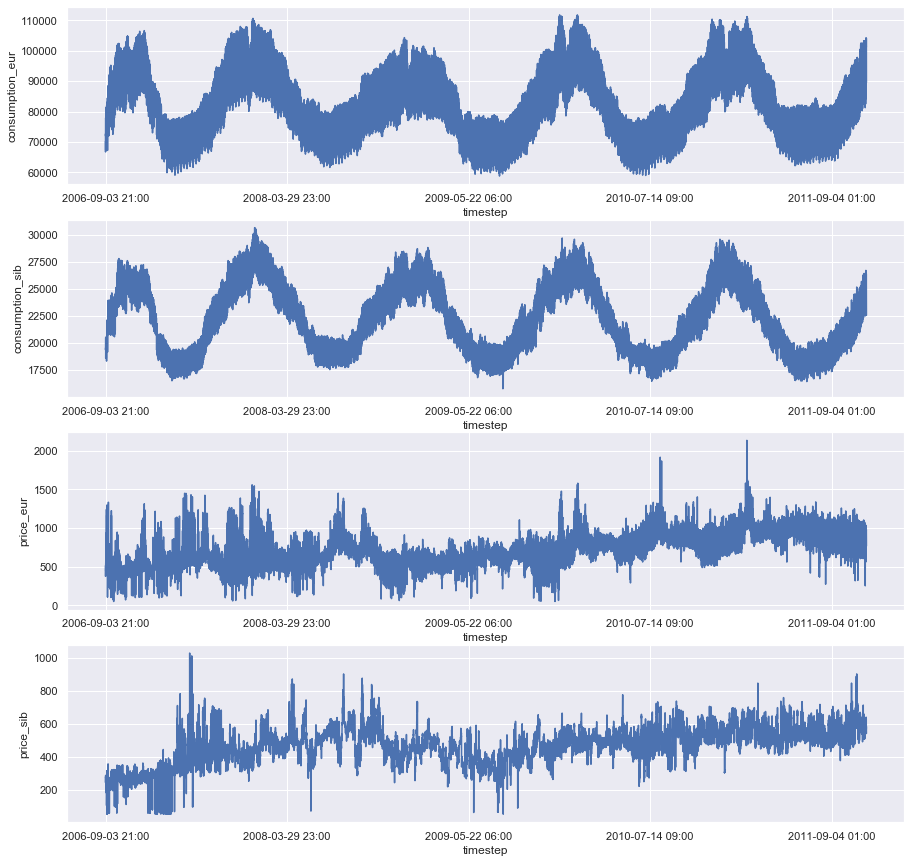

In [24]:
plt.figure(figsize = (15,15))

ax1 = plt.subplot(4, 1, 1)
dayahead_price['consumption_eur'].plot()
ax1.set_ylabel("consumption_eur")

ax2 = plt.subplot(4, 1, 2)
dayahead_price['consumption_sib'].plot()
ax2.set_ylabel("consumption_sib")

ax3 = plt.subplot(4, 1, 3)
dayahead_price['price_eur'].plot()
ax3.set_ylabel("price_eur")

ax4 = plt.subplot(4, 1, 4)
dayahead_price['price_sib'].plot()
ax4.set_ylabel("price_sib")

In [25]:
UES_dayahead_price.head()

UES_Northwest  UES_Siberia  UES_Middle_Volga  UES_Urals  \
timestep                                                                    
2017-01-01 00:00         964.67      1006.27           1032.80     953.23   
2017-01-01 01:00         984.79      1003.79           1033.34     946.79   
2017-01-01 02:00         962.54      1005.09           1029.51     944.35   
2017-01-01 03:00         888.44      1002.38            976.34     906.15   
2017-01-01 04:00         847.10      1002.58            945.28     894.08   

                  UES_Center  UES_South  
timestep                                 
2017-01-01 00:00     1050.17    1706.30  
2017-01-01 01:00     1051.15    1592.17  
2017-01-01 02:00     1039.84    1561.85  
2017-01-01 03:00      977.04    1534.37  
2017-01-01 04:00      938.27    1517.58

In [26]:
"""UES_dayahead_price["datetime"] = pd.to_datetime(UES_dayahead_price["timestep"])
UES_dayahead_price.drop("timestep", axis = 1, inplace = True)
UES_dayahead_price.set_index(["datetime"], drop = True, inplace = True)
UES_dayahead_price.head()"""

'UES_dayahead_price["datetime"] = pd.to_datetime(UES_dayahead_price["timestep"])\nUES_dayahead_price.drop("timestep", axis = 1, inplace = True)\nUES_dayahead_price.set_index(["datetime"], drop = True, inplace = True)\nUES_dayahead_price.head()'

Text(0, 0.5, 'UES_South')

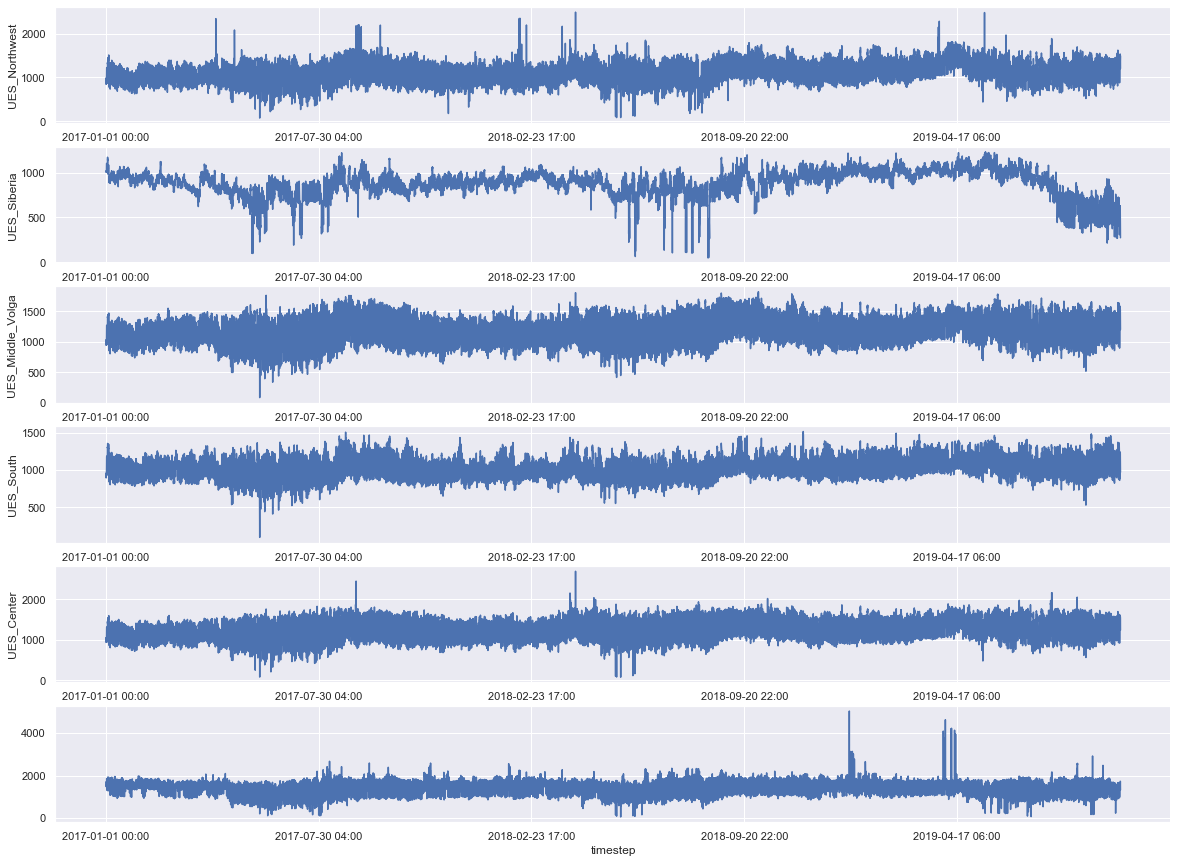

In [27]:
#time series plot
plt.figure(figsize = (20,15))

ax1 = plt.subplot(6, 1, 1)
UES_dayahead_price['UES_Northwest'].plot()
ax1.set_ylabel("UES_Northwest")

ax2 = plt.subplot(6, 1, 2)
UES_dayahead_price['UES_Siberia'].plot()
ax2.set_ylabel("UES_Siberia")

ax3 = plt.subplot(6, 1, 3)
UES_dayahead_price['UES_Middle_Volga'].plot()
ax3.set_ylabel("UES_Middle_Volga")

ax4 = plt.subplot(6, 1, 4)
UES_dayahead_price['UES_Urals'].plot()
ax4.set_ylabel("UES_Urals")

ax5 = plt.subplot(6, 1, 5)
UES_dayahead_price['UES_Center'].plot()
ax5.set_ylabel("UES_Center")

ax6 = plt.subplot(6, 1, 6)
UES_dayahead_price['UES_South'].plot()
ax4.set_ylabel("UES_South")

In [28]:
intraday_price = UES_intraday_price
intraday_price.head()

UES_Northwest  UES_Siberia  UES_Center
timestep                                                
2017-01-01 00:00          767.0        918.0       982.0
2017-01-01 01:00          675.0        889.0       848.0
2017-01-01 02:00          717.0        933.0       920.0
2017-01-01 03:00          683.0        947.0       885.0
2017-01-01 04:00          633.0        934.0       829.0

In [29]:
"""intraday_price["datetime"] = pd.to_datetime(intraday_price["timestep"])
intraday_price.drop("timestep", axis = 1, inplace = True)
intraday_price.set_index(["datetime"], drop = True, inplace = True)
intraday_price.head()"""

'intraday_price["datetime"] = pd.to_datetime(intraday_price["timestep"])\nintraday_price.drop("timestep", axis = 1, inplace = True)\nintraday_price.set_index(["datetime"], drop = True, inplace = True)\nintraday_price.head()'

Text(0, 0.5, 'UES_Center')

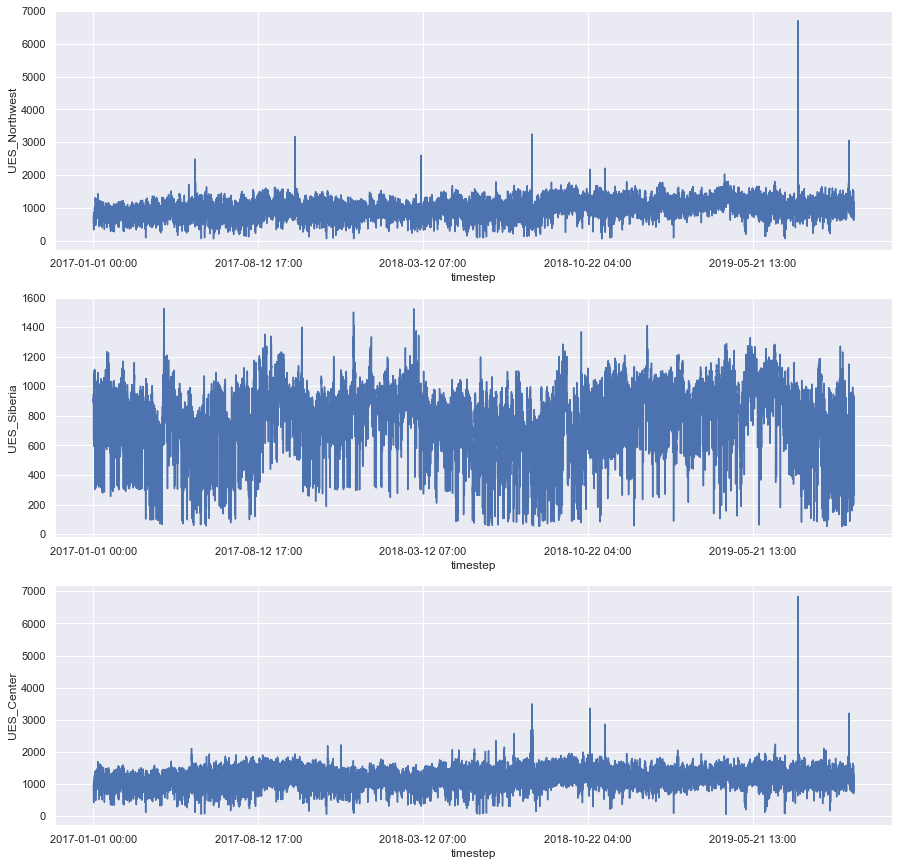

In [30]:
#time series plot
plt.figure(figsize = (15,15))

ax1 = plt.subplot(3, 1, 1)
intraday_price['UES_Northwest'].plot()
ax1.set_ylabel("UES_Northwest")

ax2 = plt.subplot(3, 1, 2)
intraday_price['UES_Siberia'].plot()
ax2.set_ylabel("UES_Siberia")

ax3 = plt.subplot(3, 1, 3)
intraday_price['UES_Center'].plot()
ax3.set_ylabel("UES_Center")


Since this is a Time series problem, we use an autoregression model.

### Check for Autocorrelation using `lag_plot()`

In [31]:
from pandas.plotting import lag_plot

In [32]:
# lets do `consumption_eur` first from the dayahead_price_volume data

# first create a dataset with the datetime and consumption_eur
consumption_eur = pd.DataFrame(dayahead_price["consumption_eur"], index = dayahead_price.index)
consumption_eur.head()



consumption_eur
timestep                         
2006-09-03 21:00          70250.0
2006-09-03 22:00          66733.0
2006-09-05 16:00          72688.0
2006-09-05 17:00          71822.0
2006-09-05 18:00          71933.0

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


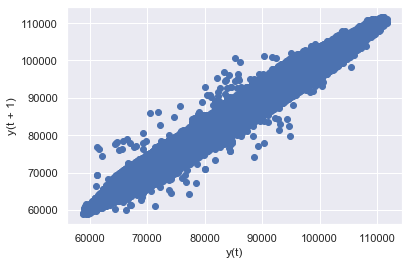

In [33]:
lag_plot(consumption_eur)
plt.show()

### Observation

A cluster of the data on the diagonal shows a high correlation in the dataset.

Let's do a Further correlation check using Pearson Correlation coeficient .corr())

In [34]:
values = pd.DataFrame(consumption_eur.values)
data = pd.concat([values.shift(1), values], axis = 1) #creates a dataset of a value -1 and value + 1
data.columns = ["t-1", "t+1"]
result = data.corr()
print(result)

          t-1       t+1
t-1  1.000000  0.982374
t+1  0.982374  1.000000


We can see a high and beautiful correlation

### Autocorrelation Plot using `autocorrelation_plot`
This plots the correlation coefficient for each lag variable. This is a good check to determine which lag variable will be a good fit for a predictive model

In [35]:
from pandas.plotting import autocorrelation_plot

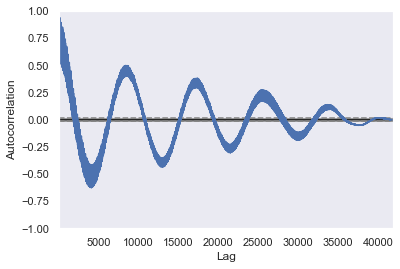

In [36]:
autocorrelation_plot(consumption_eur)
#autocorrelation_plot(, linewidth = 1)
plt.show()

Further check using the statsmodel `plot_acf`

In [37]:
from statsmodels.graphics.tsaplots import plot_acf

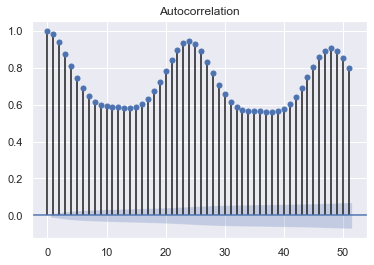

In [38]:
plot_acf(consumption_eur, lags = 51)
plt.show()

As expected, the power consumptions seem to have a nice symmetrical cyclic pattern.
The prices though seem to be quite volatile, but not unexpeted certainly.
The prices also seem to have a lot of values that are zero before the year 2010.

Since we are going to use a form of auto-regression, we are only going to use historical data of any particular attribute to make predictions for that attribute.

Let's do some autocorrelation analysis for each of the four attributes.

## THE PROPHET

In [39]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
from scipy import stats
import statsmodels.api as sm
import matplotlib.pyplot as plt

%matplotlib inline

 Focus - dayahead_price data

In [40]:
dayahead_price.head()

consumption_eur  consumption_sib  price_eur  price_sib
timestep                                                                
2006-09-03 21:00          70250.0          19531.0     514.92     276.99
2006-09-03 22:00          66733.0          19397.0     375.61     242.27
2006-09-05 16:00          72688.0          19364.0     503.68     255.55
2006-09-05 17:00          71822.0          19336.0     481.50     267.84
2006-09-05 18:00          71933.0          19410.0     475.10     272.73

In [41]:
#consumption_eur = pd.DataFrame(dayahead_price["consumption_eur"], index = dayahead_price.index)
dayahead_price = dayahead_price.reset_index()
dayahead_price["timestep"] = pd.to_datetime(dayahead_price["timestep"])

# Aggregate data
daily_data = dayahead_price.groupby("timestep").mean()
weekly_data = daily_data.resample("W").mean()

weekly_data.head

<bound method NDFrame.head of             consumption_eur  consumption_sib    price_eur   price_sib
timestep                                                             
2006-09-03     68491.500000     19464.000000   445.265000  259.630000
2006-09-10     74765.333333     19724.777778   527.617222  273.550556
2006-09-17     71214.500000     18793.500000   484.070000  233.505000
2006-09-24     78770.358491     19810.283019   759.890189  237.627547
2006-10-01     78232.200000     21176.100000   582.057000  133.941000
2006-10-08     78575.687500     20999.187500   450.913125  231.056250
2006-10-15     83811.926829     23030.390244   559.016341  285.093659
2006-10-22     84333.238532     22459.339450   476.568073  238.224862
2006-10-29     84503.006849     22815.993151   472.125274  264.120548
2006-11-05     87355.352273     22711.000000   436.106023  261.158182
2006-11-12     90789.555556     23317.129630   512.387963  196.717222
2006-11-19     94891.647059     24079.264706   515.127647  2

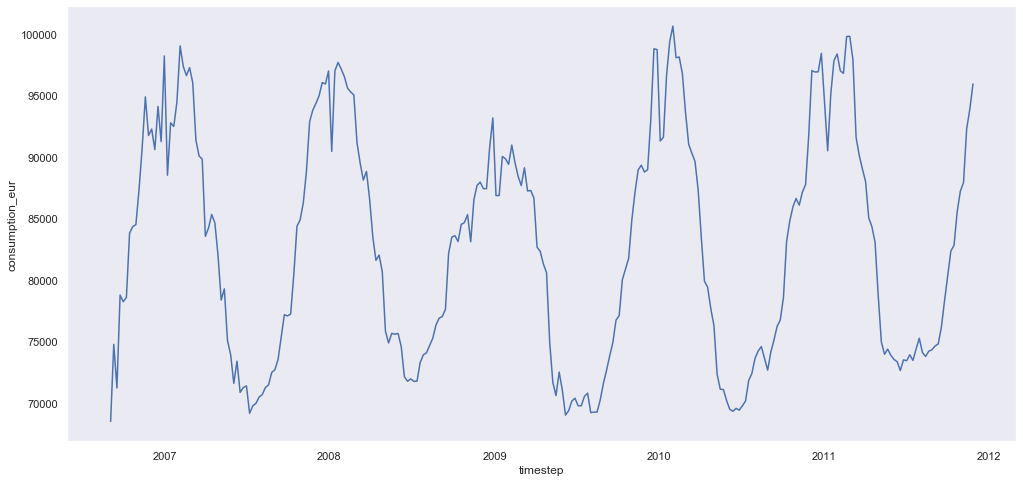

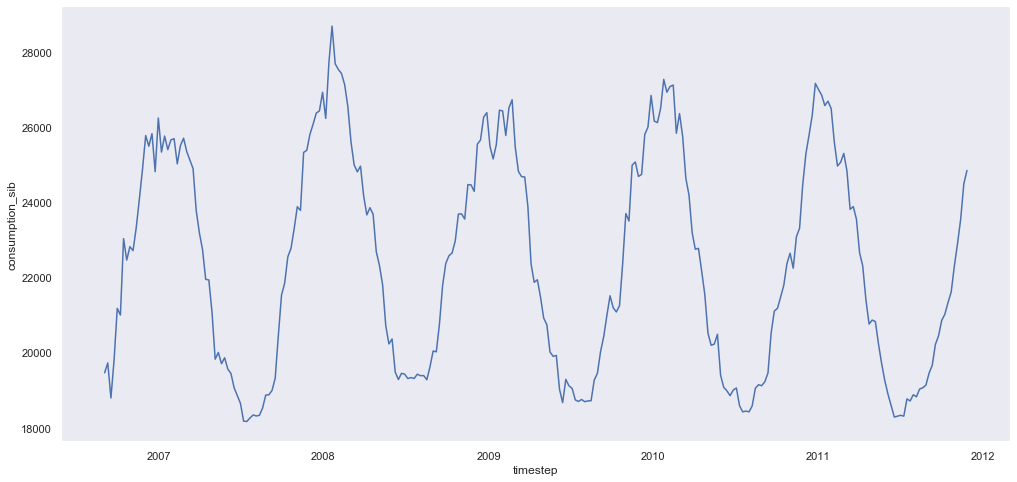

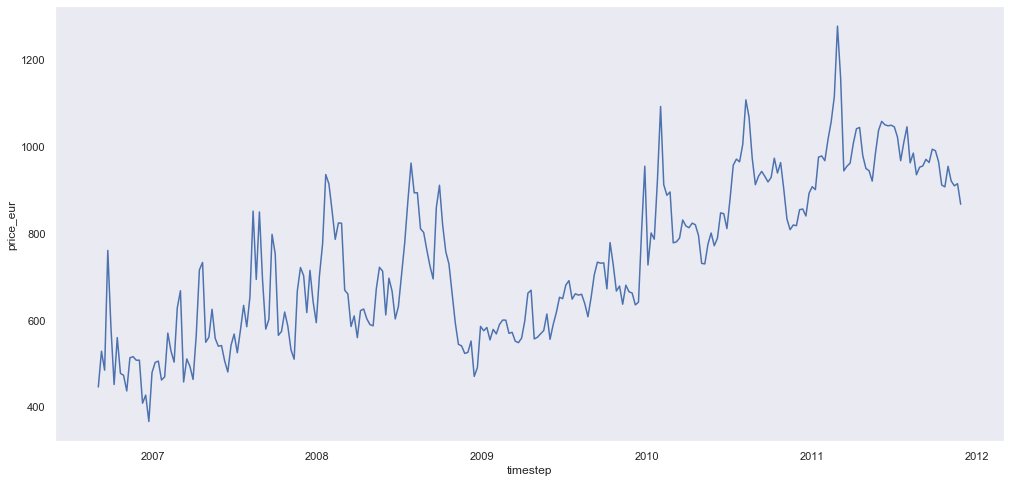

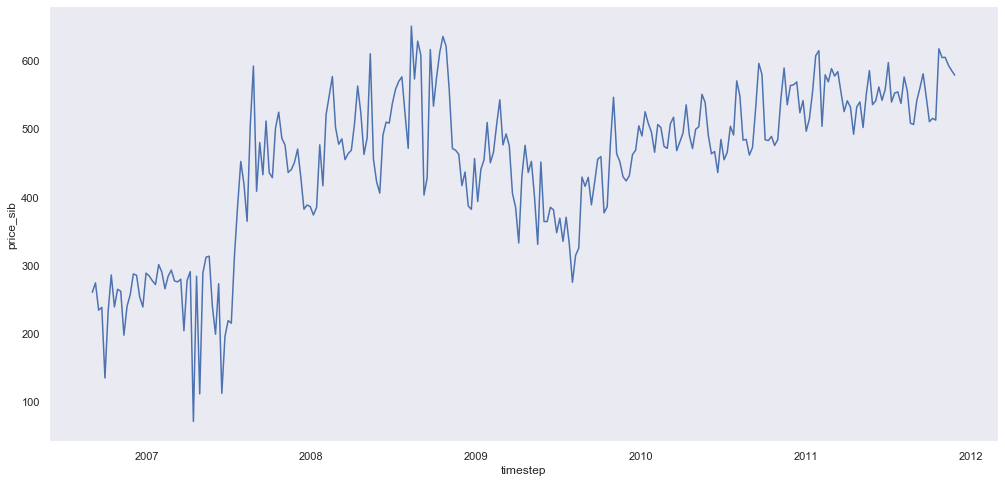

In [43]:
# Plot the weekly data
def plot_data(col):
    plt.figure(figsize=(17, 8))
    plt.plot(weekly_data[col])
    plt.xlabel('timestep')
    plt.ylabel(col)
    plt.grid()
    plt.show()
    
for col in weekly_data.columns:
    plot_data(col) 


## Modeling with `Prophet`

In [ ]:

#conda install -c conda-forge fbprophet

In [44]:
#import Prophet
from prophet import Prophet
import logging

#Create single dataset
wd_con = pd.DataFrame(weekly_data["consumption_eur"], index = weekly_data.index)
wd_con.head()

logging.getLogger().setLevel(logging.ERROR)

#Change columns to "ds" & "y" according to Prophet guidelines
wd_cons = wd_con.reset_index()
wd_cons.columns = ["ds", "y"]
wd_cons.head()

#split into test train data (last 30 values)
pred_size = 30
train = wd_cons[: - pred_size]

#Initialize and train Model
model = Prophet()
model.fit(train)

#Predict
pred = model.make_future_dataframe(periods = pred_size)
prediction = model.predict(pred)
prediction.head()


Importing plotly failed. Interactive plots will not work.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


ds         trend    yhat_lower    yhat_upper   trend_lower  \
0 2006-09-03  82622.119522  70798.967245  76382.915887  82622.119522   
1 2006-09-10  82631.237901  71731.752120  77291.781940  82631.237901   
2 2006-09-17  82640.356280  72876.653927  78630.998544  82640.356280   
3 2006-09-24  82649.474659  74687.040182  80155.488924  82649.474659   
4 2006-10-01  82658.593038  76510.099162  82144.258181  82658.593038   

    trend_upper  additive_terms  additive_terms_lower  additive_terms_upper  \
0  82622.119522    -9055.074997          -9055.074997          -9055.074997   
1  82631.237901    -8143.254352          -8143.254352          -8143.254352   
2  82640.356280    -6880.621366          -6880.621366          -6880.621366   
3  82649.474659    -5233.072972          -5233.072972          -5233.072972   
4  82658.593038    -3377.566997          -3377.566997          -3377.566997   

        yearly  yearly_lower  yearly_upper  multiplicative_terms  \
0 -9055.074997  -9055.074997  -9055.074997                   0.0   
1 -8143.254352  -8143.254352  -8143.254352                   0.0   
2 -6880.621366  -6880.621366  -6880.621366                   0.0   
3 -5233.072972  -5233.072972  -5233.072972                   0.0   
4 -3377.566997  -3377.566997  -3377.566997                   0.0   

   multiplicative_terms_lower  multiplicative_terms_upper          yhat  
0                         0.0                         0.0  73567.044525  
1                         0.0                         0.0  74487.983550  
2                         0.0                         0.0  75759.734914  
3                         0.0                         0.0  77416.401687  
4                         0.0                         0.0  79281.026041

In [45]:
prediction

ds         trend    yhat_lower     yhat_upper   trend_lower  \
0   2006-09-03  82622.119522  70798.967245   76382.915887  82622.119522   
1   2006-09-10  82631.237901  71731.752120   77291.781940  82631.237901   
2   2006-09-17  82640.356280  72876.653927   78630.998544  82640.356280   
3   2006-09-24  82649.474659  74687.040182   80155.488924  82649.474659   
4   2006-10-01  82658.593038  76510.099162   82144.258181  82658.593038   
5   2006-10-08  82667.711417  78200.830228   83768.283815  82667.711417   
6   2006-10-15  82676.829796  79666.484851   85277.264213  82676.829796   
7   2006-10-22  82685.948175  80814.534747   86577.212011  82685.948175   
8   2006-10-29  82695.066554  82572.968240   87926.884381  82695.066554   
9   2006-11-05  82704.184931  84060.361983   89675.105522  82704.184931   
10  2006-11-12  82713.303308  85772.344023   91496.537147  82713.303308   
11  2006-11-19  82722.421685  87047.702056   92590.677822  82722.421685   
12  2006-11-26  82731.540062  88070.555091   93500.726752  82731.540062   
13  2006-12-03  82740.658439  89117.817121   94696.927147  82740.658439   
14  2006-12-10  82749.776816  90834.023336   96102.497583  82749.776816   
15  2006-12-17  82758.895193  92053.165504   97587.390166  82758.895193   
16  2006-12-24  82768.013570  92183.803771   97697.260061  82768.013570   
17  2006-12-31  82777.131949  91316.417457   96687.235224  82777.131949   
18  2007-01-07  82786.250329  90071.140305   95719.997908  82786.250329   
19  2007-01-14  82795.368709  90093.709047   95686.866752  82795.368709   
20  2007-01-21  82804.487089  91444.624612   97098.318036  82804.487089   
21  2007-01-28  82813.605468  93436.582821   98962.600119  82813.605468   
22  2007-02-04  82822.723848  94280.908184   99815.240897  82822.723848   
23  2007-02-11  82831.842228  93907.235598   99541.267829  82831.842228   
24  2007-02-18  82840.960605  92776.241079   98324.878063  82840.960605   
25  2007-02-25  82850.078982  91833.229487   97054.813878  82850.078982   
26  2007-03-04  82859.197360  90561.282791   96058.807243  82859.197360   
27  2007-03-11  82868.315737  89330.623256   94846.287409  82868.315737   
28  2007-03-18  82877.434114  87107.665062   92840.912339  82877.434114   
29  2007-03-25  82886.552492  84868.177095   90510.808379  82886.552492   
30  2007-04-01  82895.670869  82904.753782   88571.065238  82895.670869   
31  2007-04-08  82904.789246  81693.246582   87385.750025  82904.789246   
32  2007-04-15  82913.907623  80398.457929   86124.964034  82913.907623   
33  2007-04-22  82923.026000  78729.113411   84049.733568  82923.026000   
34  2007-04-29  82932.144377  76224.653699   81895.319508  82932.144377   
35  2007-05-06  82941.262754  73788.004244   79493.595149  82941.262754   
36  2007-05-13  82950.381131  71991.765074   77604.059265  82950.381131   
37  2007-05-20  82959.499508  71057.244339   76523.307521  82959.499508   
38  2007-05-27  82968.617885  70187.602068   75980.612070  82968.617885   
39  2007-06-03  82977.736262  70117.717256   75267.097238  82977.736262   
40  2007-06-10  82986.854640  69118.237741   74828.446651  82986.854640   
41  2007-06-17  82995.973018  68447.896381   74118.848574  82995.973018   
42  2007-06-24  83005.091396  68252.602331   73887.778379  83005.091396   
43  2007-07-01  83014.209774  67934.164693   73406.340780  83014.209774   
44  2007-07-08  83023.328151  68246.280845   73713.200675  83023.328151   
45  2007-07-15  83032.446529  68529.817421   73946.710654  83032.446529   
46  2007-07-22  83041.564907  69006.599262   74762.915605  83041.564907   
47  2007-07-29  83050.683285  69786.653581   75263.011682  83050.683285   
48  2007-08-05  83059.801662  69910.433034   75505.285485  83059.801662   
49  2007-08-12  83068.920039  70133.790732   75862.322816  83068.920039   
50  2007-08-19  83078.038416  70340.136063   75752.531948  83078.038416   
51  2007-08-26  83087.156793  70359.817548   76004.697737  83087.156793   
52  2007-09-02  83096.275169  71281.4

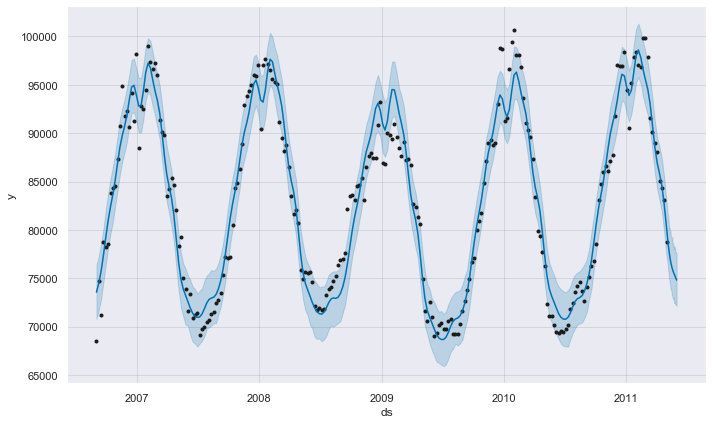

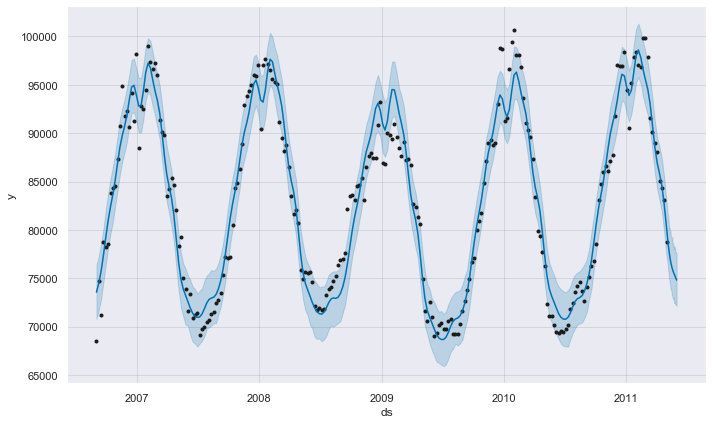

In [46]:
#plot Prediction
model.plot(prediction)

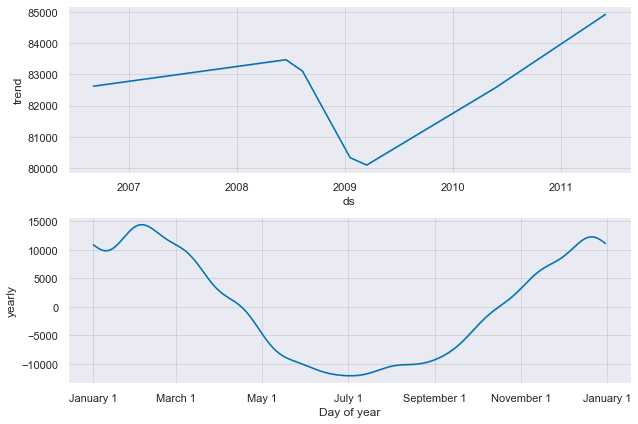

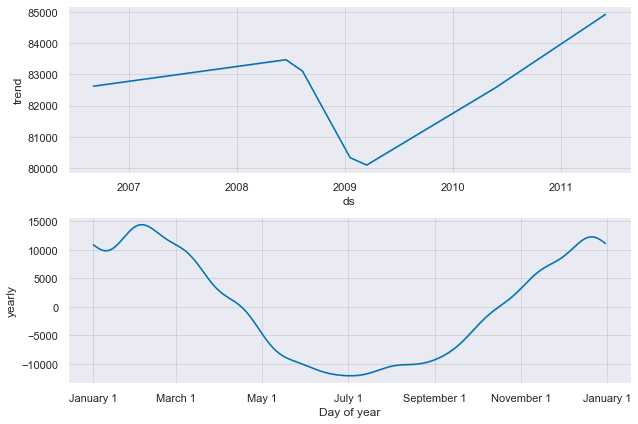

In [47]:

#plot forcast components
model.plot_components(prediction)


In [48]:
#evaluate Model
def evaluate(data, predicted):
    return prediction.set_index("ds")[["yhat", "yhat_lower", "yhat_upper"]].join(data.set_index("ds"))

eval_data = evaluate(wd_cons, prediction)
eval_data.head()

yhat    yhat_lower    yhat_upper             y
ds                                                                
2006-09-03  73567.044525  70798.967245  76382.915887  68491.500000
2006-09-10  74487.983550  71731.752120  77291.781940  74765.333333
2006-09-17  75759.734914  72876.653927  78630.998544  71214.500000
2006-09-24  77416.401687  74687.040182  80155.488924  78770.358491
2006-10-01  79281.026041  76510.099162  82144.258181  78232.200000

In [50]:
def pred_errors(df, prediction_size):
    
    df = eval_data.copy()
    
    df['e'] = df['y'] - df['yhat']
    df['p'] = 100 * df['e'] / df['y']
    
    predicted_part = df[-pred_size:]
    
    error_mean = lambda error_name: np.mean(np.abs(predicted_part[error_name]))
    
    return {'MAPE': error_mean('p'), 'MAE': error_mean('e')}

for err_name, err_value in pred_errors(eval_data, pred_size).items():
    print(err_name, err_value)



MAPE 2.613852732714024
MAE 1944.4250267033094


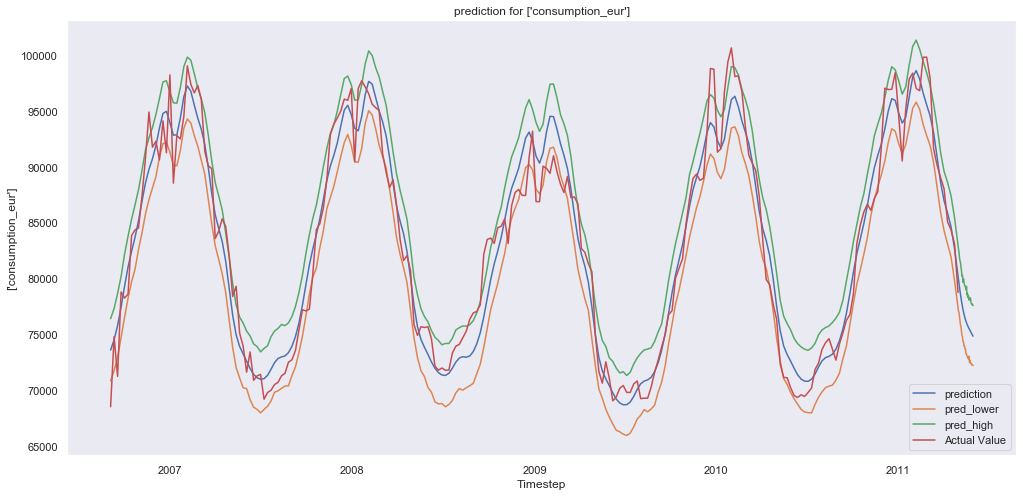

In [51]:
# Plot forecast with upper and lower bounds
plt.figure(figsize=(17, 8))
plt.plot(eval_data['yhat'], label = "prediction")
plt.plot(eval_data['yhat_lower'], label = "pred_lower")
plt.plot(eval_data['yhat_upper'], label = "pred_high")
plt.plot(eval_data['y'], label = "Actual Value")
plt.xlabel('Timestep')
plt.ylabel(wd_con.columns.values)
plt.title(f"prediction for {wd_con.columns.values}")
plt.grid(False)
plt.legend()
plt.show()

In [223]:
#Functions 

#import Prophet
from prophet import Prophet
import logging

logging.getLogger().setLevel(logging.ERROR)

#Functions to automate

#resample data by week
def resample_weekly(data):
    data.reset_index(drop = True, inplace = True)
    data["timestep"] = pd.to_datetime(data["timestep"])
    #data.drop("timestep", axis = 1)

    #Aggregate data
    global weekly_data 
    daily_data = data.groupby("timestep").mean()
    weekly_data = daily_data.resample("W").mean()
     
    return weekly_data

# Plot the weekly data
def plot_data(data):
    for col in data.columns:
        plt.figure(figsize=(17, 8))
        plt.plot(data[col])
        plt.xlabel('timestep')
        plt.ylabel(col)
        plt.title(f"Weekly Data for {col}")
        plt.grid(False)
        plt.show()
    


#Modeling

#Create single dataset & Change columns
def single_data(data):
    global wd_cons
    global lst
    lst = []
    for col in data:
        wd_con = pd.DataFrame(data[col], index = data.index)
        wd_cons = wd_con.reset_index()
        wd_cons.columns = ["ds", "y"]
        lst.append(wd_cons)

    return lst

#split into test train data (last 30 values), Train & Predict model
def split_train_predict(lst):
    global pred_size 
    pred_size = 30
    global pred_lst
    global pred_vals
    pred_lst = []
    for item in lst:
        train = item[: - pred_size]
        model = Prophet()
        model.fit(train)
    
        #Predict
        global pred_vals
        pred = model.make_future_dataframe(periods = pred_size)
        pred_vals = model.predict(pred)
        pred_lst.append(pred_vals)
        
    return pred_lst
    


"""#plot Prediction
model.plot(prediction)

#plot forcast components
model.plot_components(prediction)"""

#evaluate Model
def evaluate(historical, predicted):
        eva = predicted.set_index("ds")[["yhat", "yhat_lower", "yhat_upper"]].join(historical.set_index("ds"))
        return eva 
    
    
"""eval_data = evaluate(wd_cons, prediction)
eval_data.head()"""

def pred_errors(df, prediction_size):
    #df = df.copy()
    
    df['e'] = df['y'] - df['yhat']
    df['p'] = 100 * df['e'] / df['y']
    
    predicted_part = df[-pred_size:]
    
    error_mean = lambda error_name: np.mean(np.abs(predicted_part[error_name]))
    
    return {'MAPE': error_mean('p'), 'MAE': error_mean('e')}

"""for err_name, err_value in pred_errors(eval_data, pred_size).items():
    print(err_name, err_value)"""


"""# Plot forecast with upper and lower bounds
plt.figure(figsize=(17, 8))
plt.plot(eval_data['yhat'], label = "prediction")
plt.plot(eval_data['yhat_lower'], label = "pred_lower")
plt.plot(eval_data['yhat_upper'], label = "pred_high")
plt.plot(eval_data['y'], label = "Actual Value")
plt.xlabel('Timestep')
plt.ylabel(wd_con.columns.values)
plt.title(f"prediction for {wd_con.columns.values}")
plt.grid(False)
plt.legend()
plt.show()"""

'# Plot forecast with upper and lower bounds\nplt.figure(figsize=(17, 8))\nplt.plot(eval_data[\'yhat\'], label = "prediction")\nplt.plot(eval_data[\'yhat_lower\'], label = "pred_lower")\nplt.plot(eval_data[\'yhat_upper\'], label = "pred_high")\nplt.plot(eval_data[\'y\'], label = "Actual Value")\nplt.xlabel(\'Timestep\')\nplt.ylabel(wd_con.columns.values)\nplt.title(f"prediction for {wd_con.columns.values}")\nplt.grid(False)\nplt.legend()\nplt.show()'

### Prediction for `UES_intraday_price`

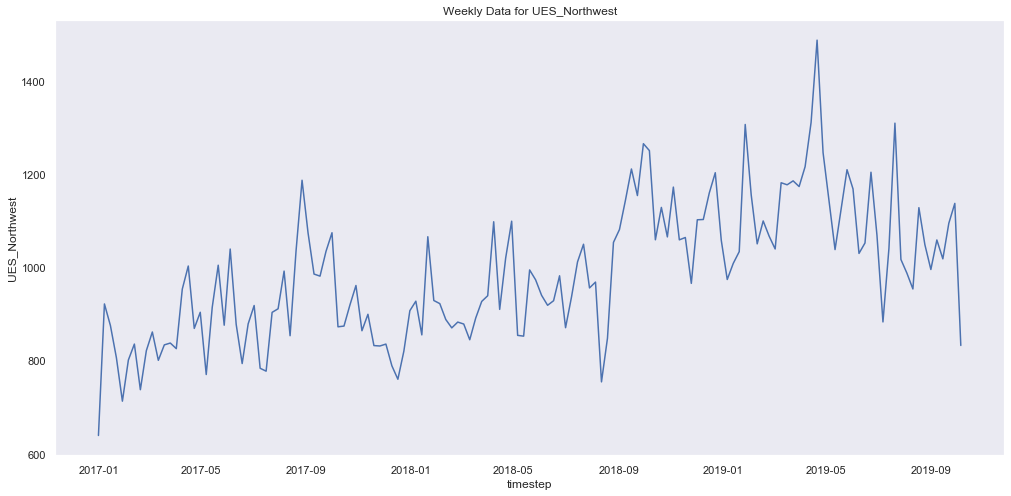

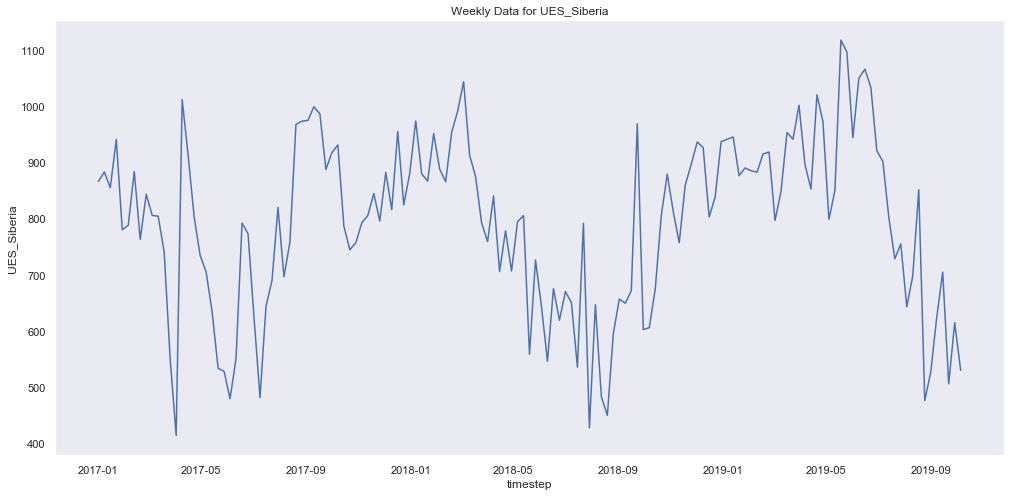

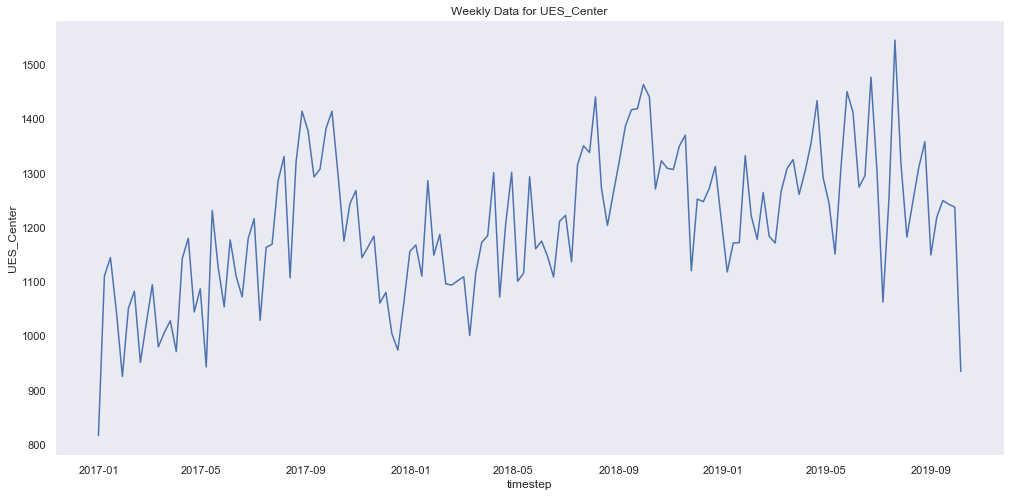

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


{'MAPE': 3.543941386679531, 'MAE': 41.928578316834205}
{'MAPE': 24.839827802203832, 'MAE': 237.21279309703326}
{'MAPE': 4.757878417378294, 'MAE': 62.59193391796737}


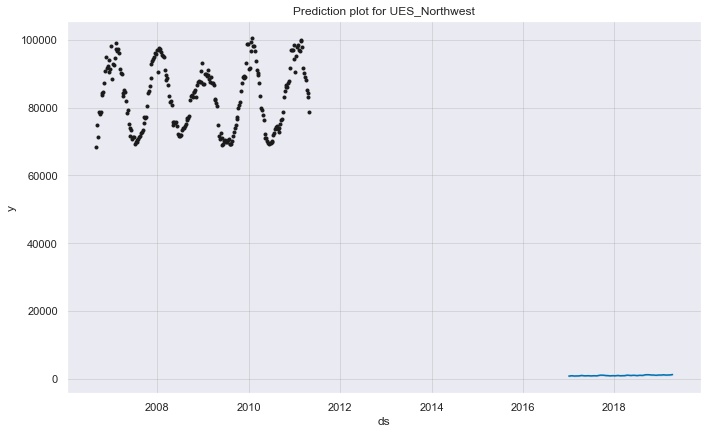

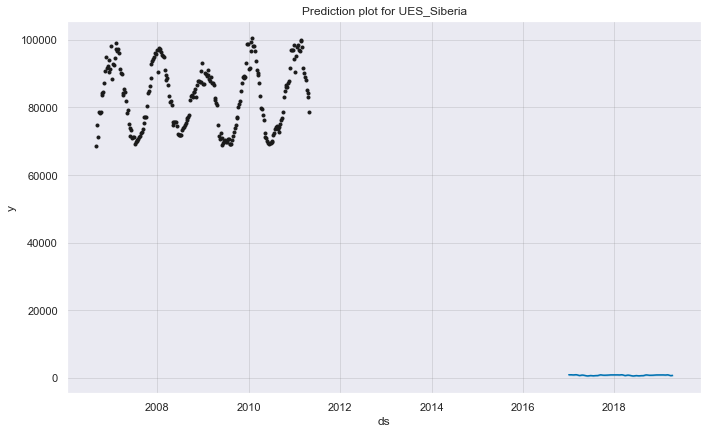

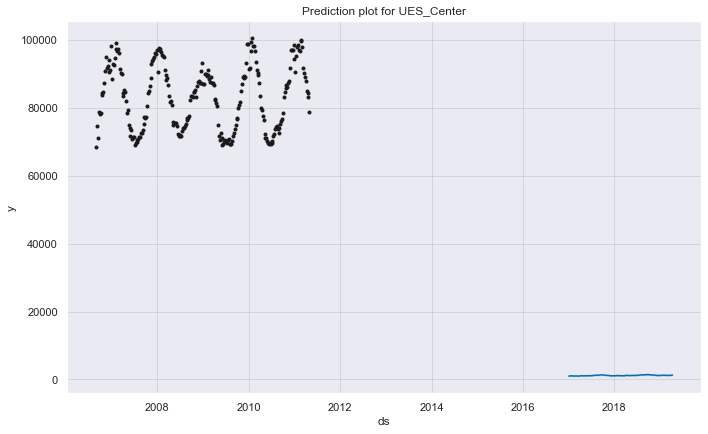

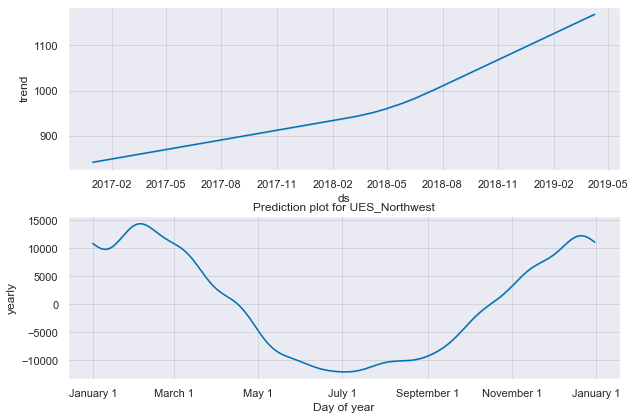

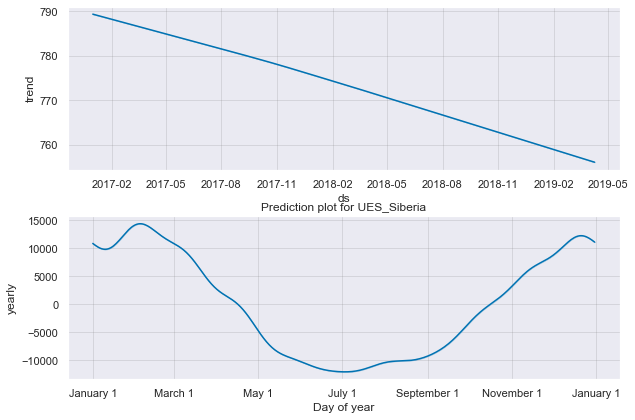

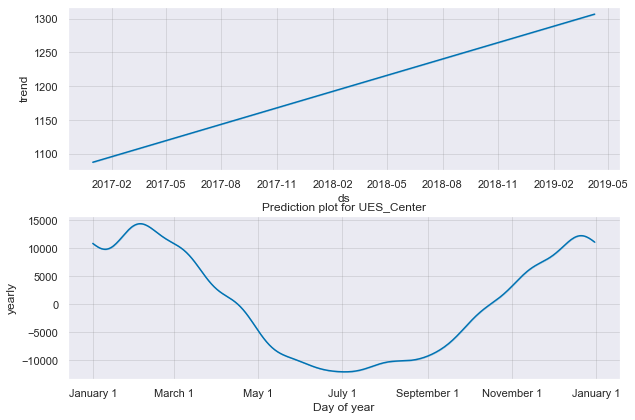

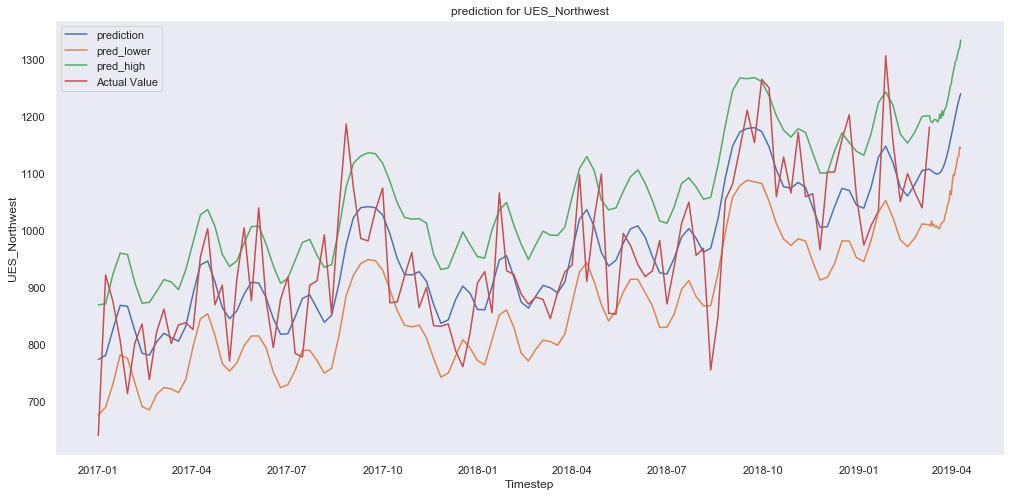

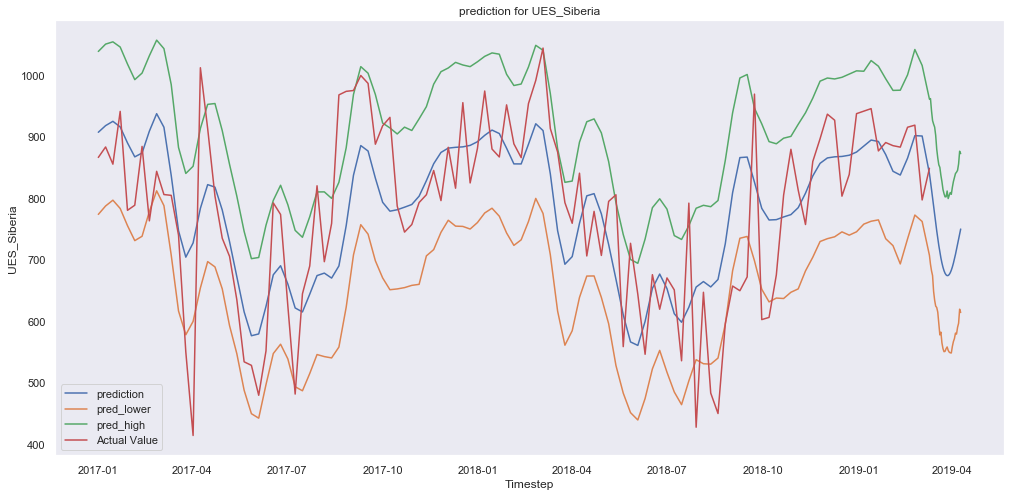

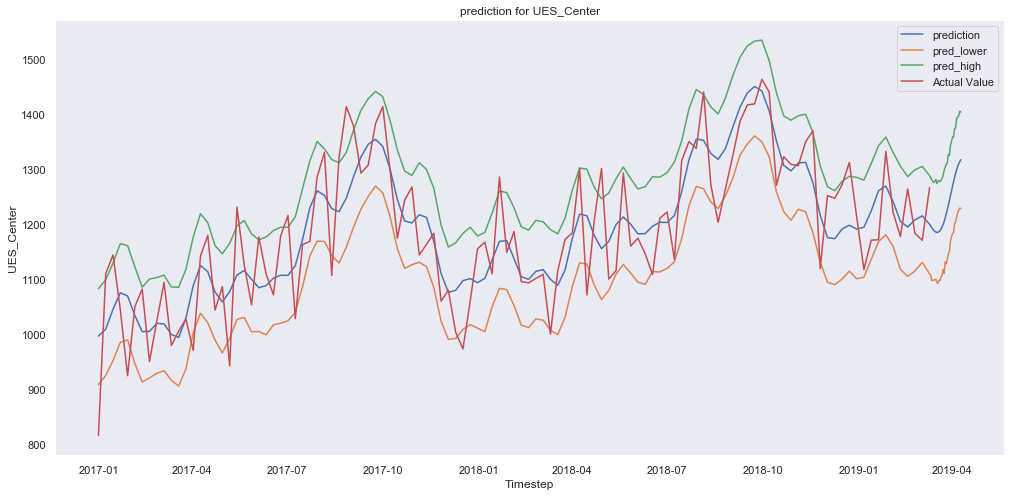

In [226]:
# Merge all code in a single run

#resample to weekly data
resample_weekly(UES_intraday_price)

#plot weekly_data
plot_data(weekly_data)

#split dataset into single data in a list
single_data(weekly_data) 

#split each data in test_train and predict
split_train_predict(lst)

#plot Prediction
for item, cols in zip(pred_lst, weekly_data):
    model.plot(item)
    plt.title(f"Prediction plot for {cols}")
    

#plot forcast components
for items, cols in zip(pred_lst, weekly_data):
    model.plot_components(items)
    plt.title(f"Prediction plot for {cols}")
    
    
#evaluate data
eval_data = list(map(lambda X: evaluate(X[0],X[1]), list(zip(lst,pred_lst))))
eval_data

#calc prediction error
for it in eval_data:
    pred_error = pred_errors(it, pred_size)
    print(pred_error)

# Plot forecast with upper and lower bounds
for data, col in zip(eval_data, weekly_data):      
    plt.figure(figsize=(17, 8))
    plt.plot(data['yhat'], label = "prediction")
    plt.plot(data['yhat_lower'], label = "pred_lower")
    plt.plot(data['yhat_upper'], label = "pred_high")
    plt.plot(data['y'], label = "Actual Value")
    plt.xlabel('Timestep')
    plt.ylabel(col)
    plt.title(f"prediction for {col}")
    plt.grid(False)
    plt.legend()
    plt.show()

### Prediction for `UES_dayahead_price`

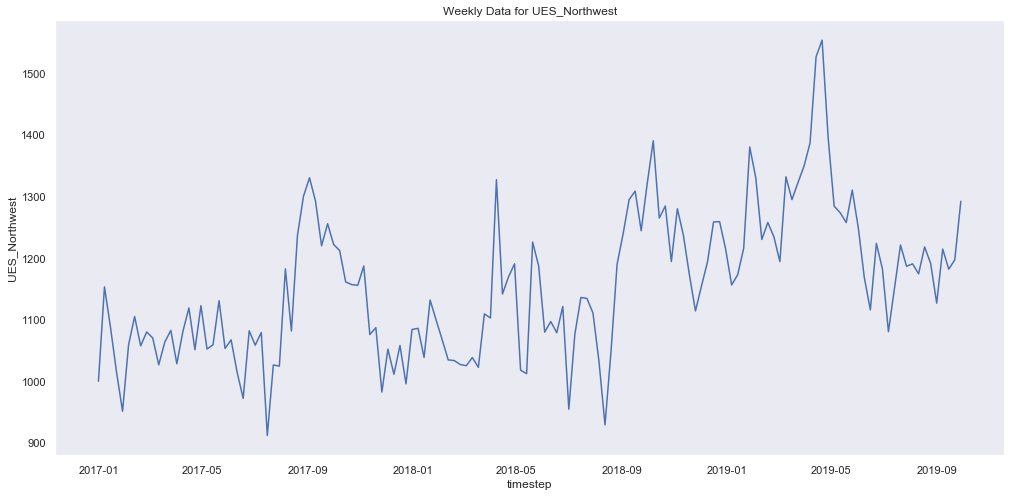

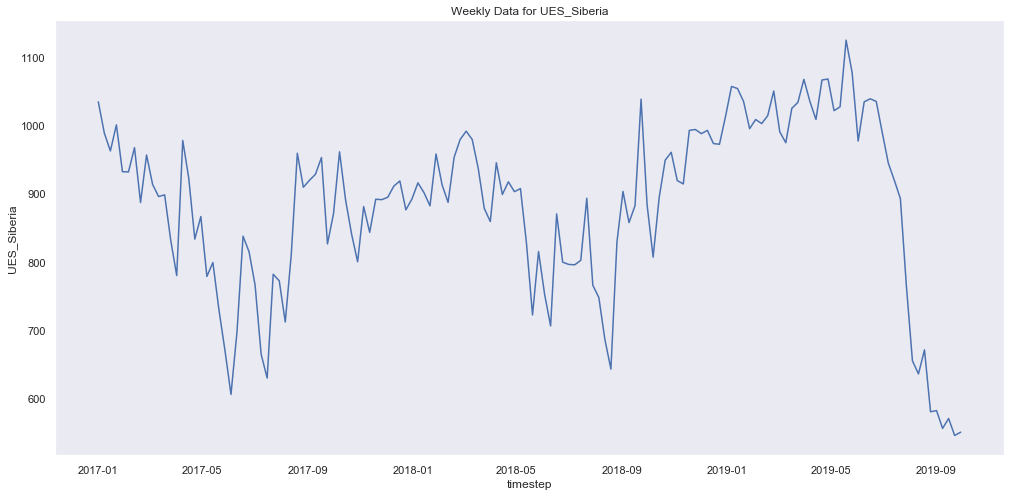

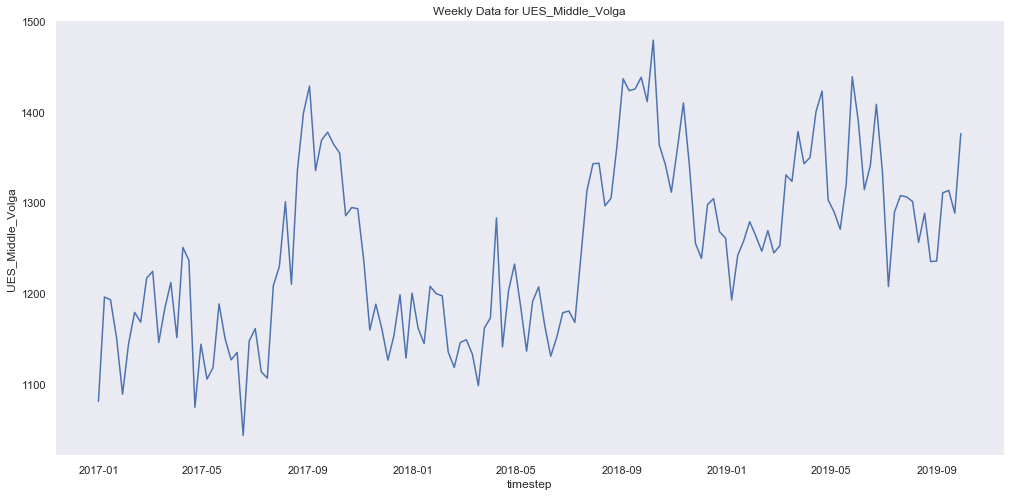

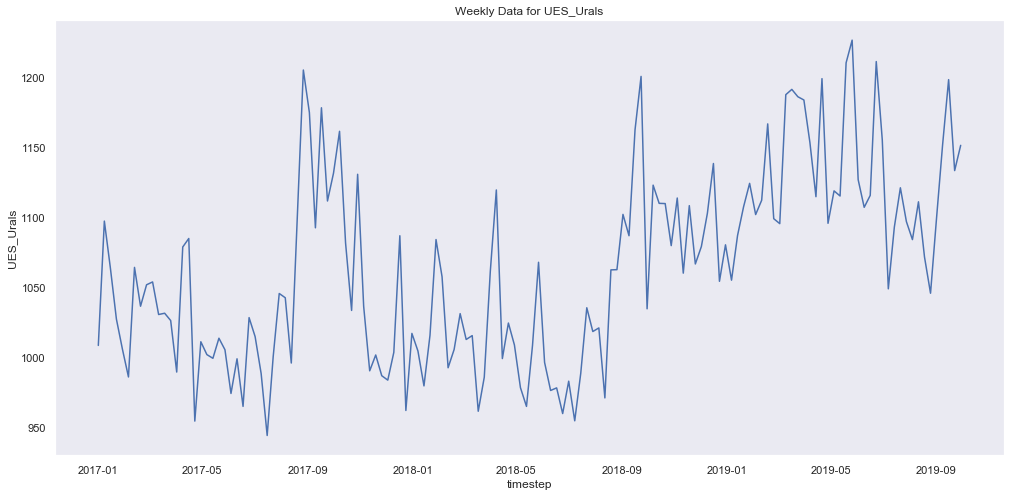

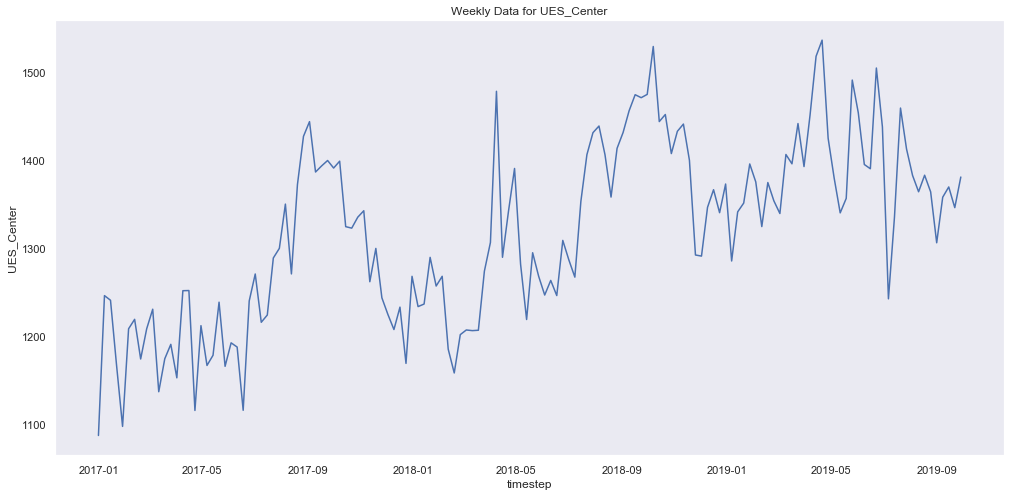

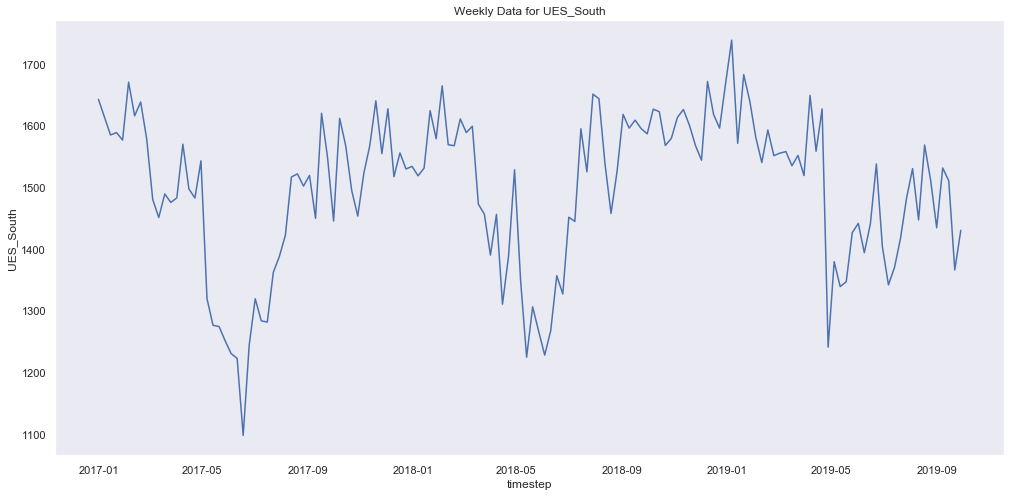

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to overr

{'MAPE': 6.252589992836836, 'MAE': 82.680848273158}
{'MAPE': 7.845102518140156, 'MAE': 81.58246623506597}
{'MAPE': 5.560277925994042, 'MAE': 74.98442715745}
{'MAPE': 7.719641304730664, 'MAE': 91.66106282241515}
{'MAPE': 4.374230728659381, 'MAE': 61.914503888687705}
{'MAPE': 1.5738339841453572, 'MAE': 24.245448801552868}


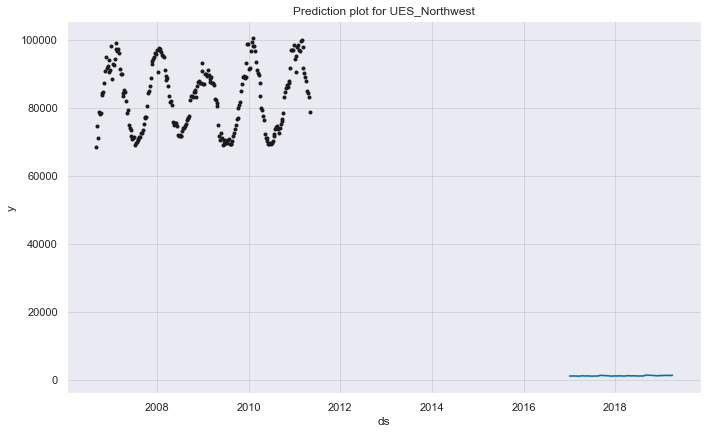

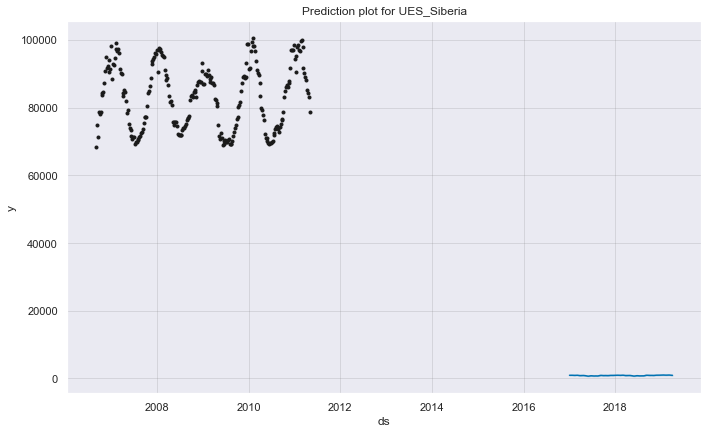

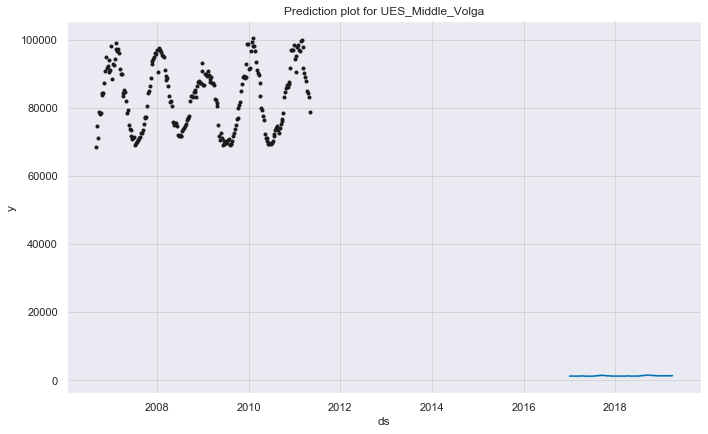

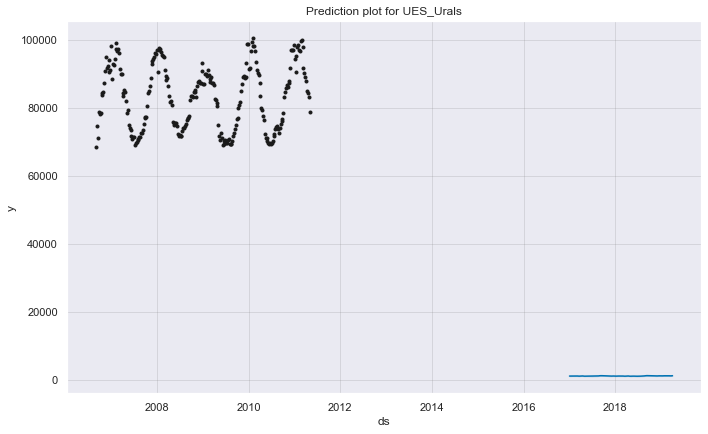

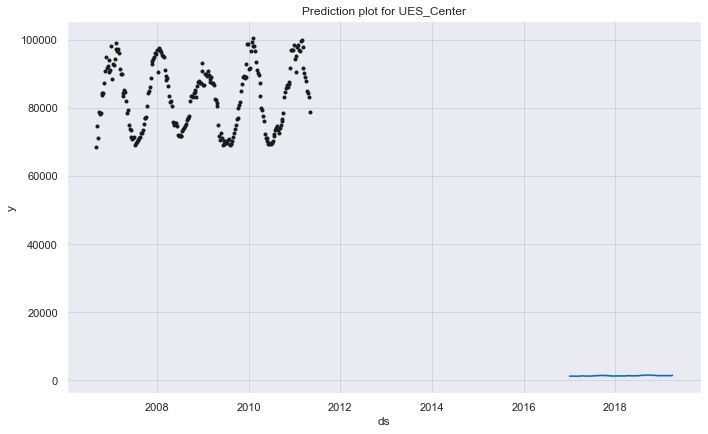

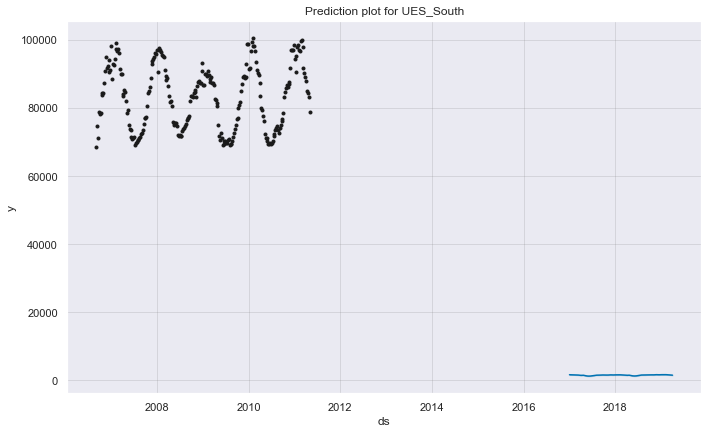

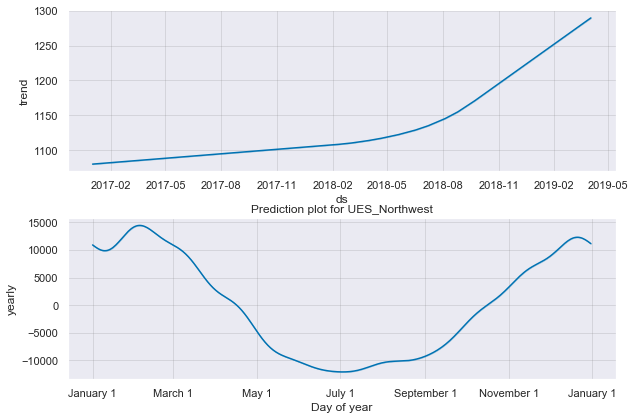

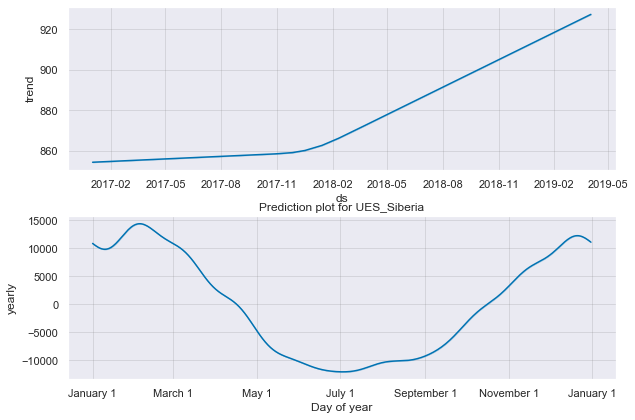

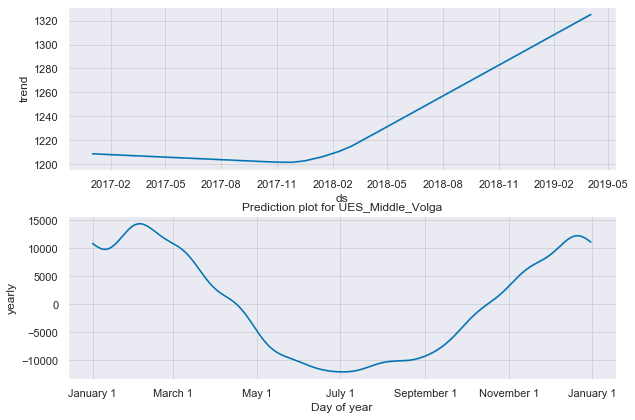

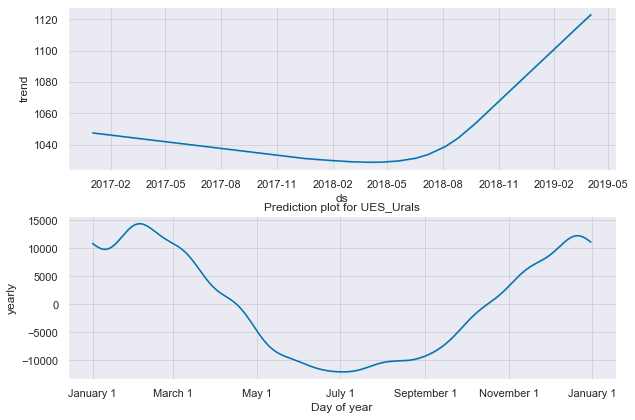

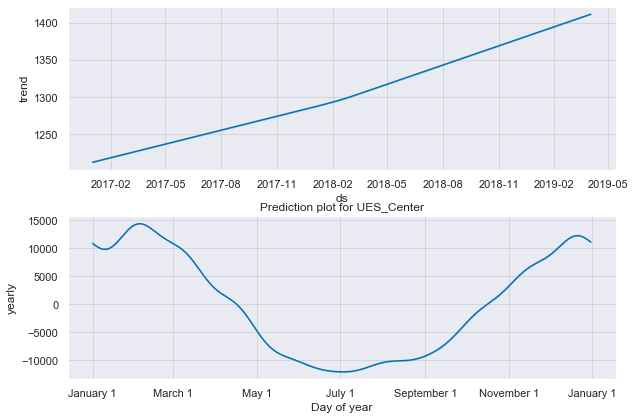

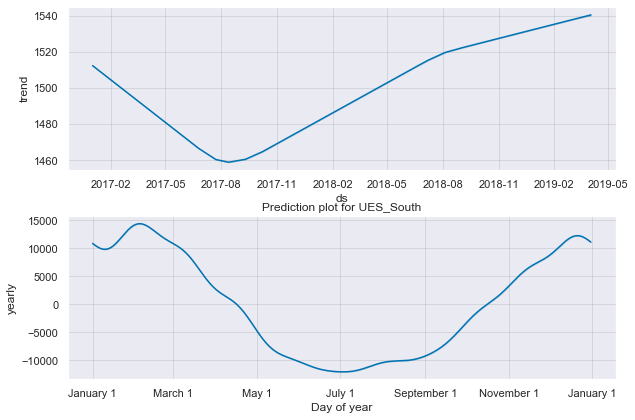

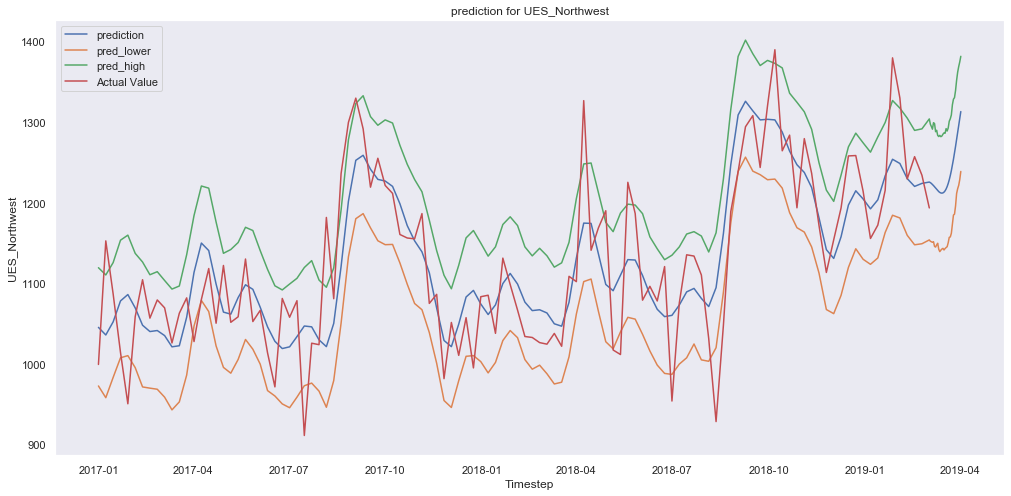

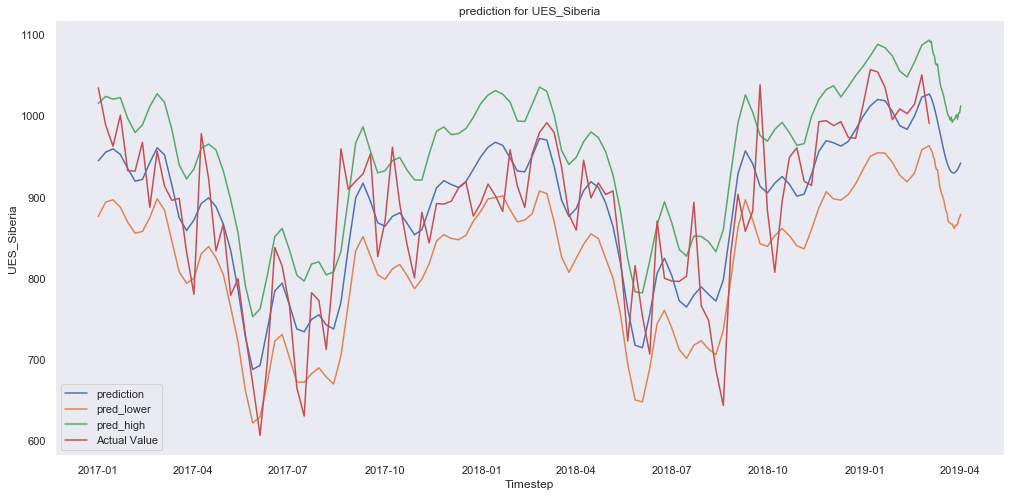

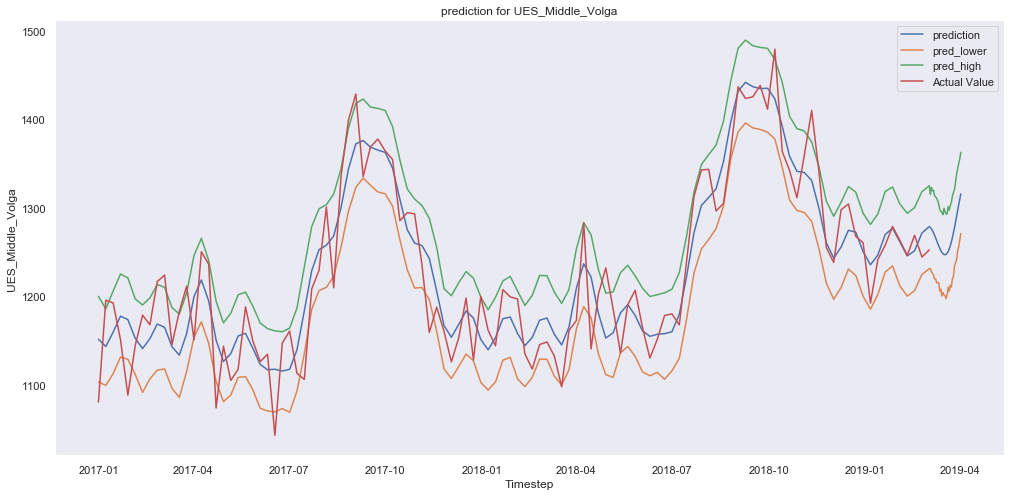

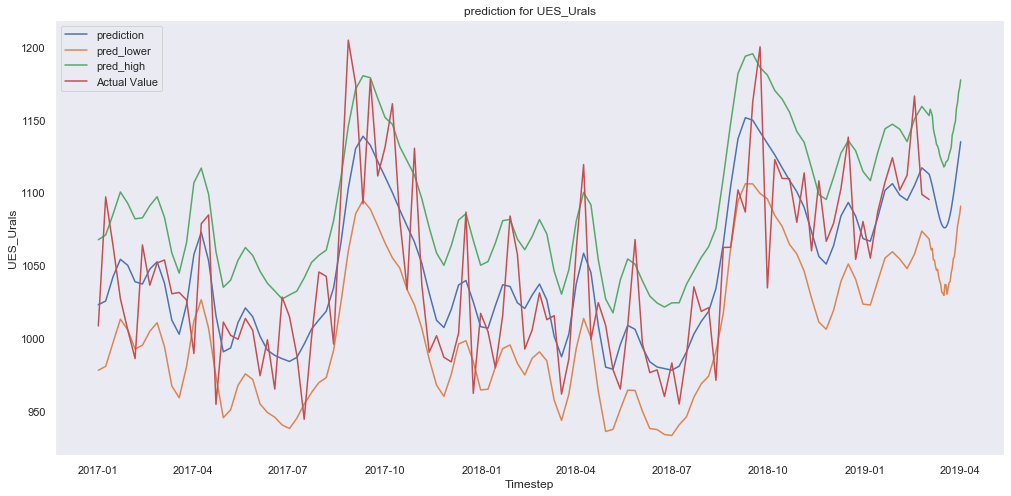

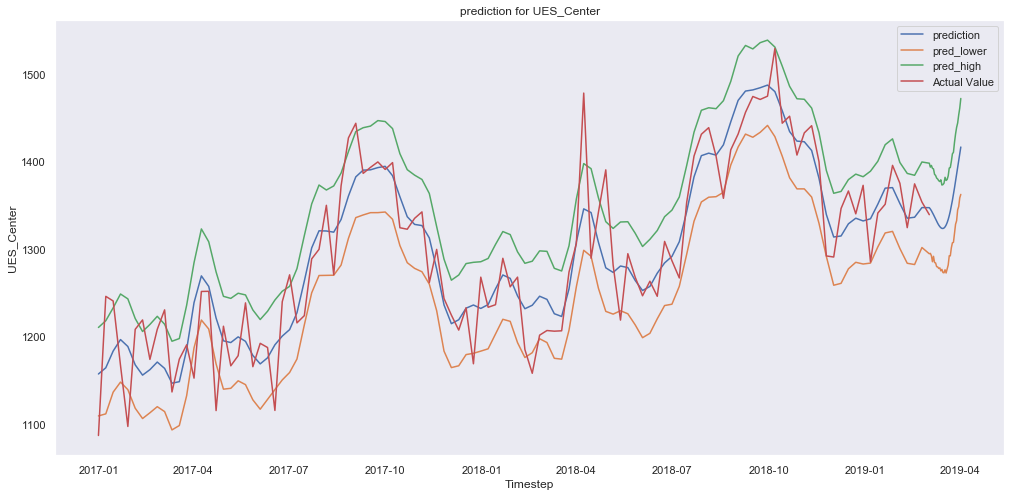

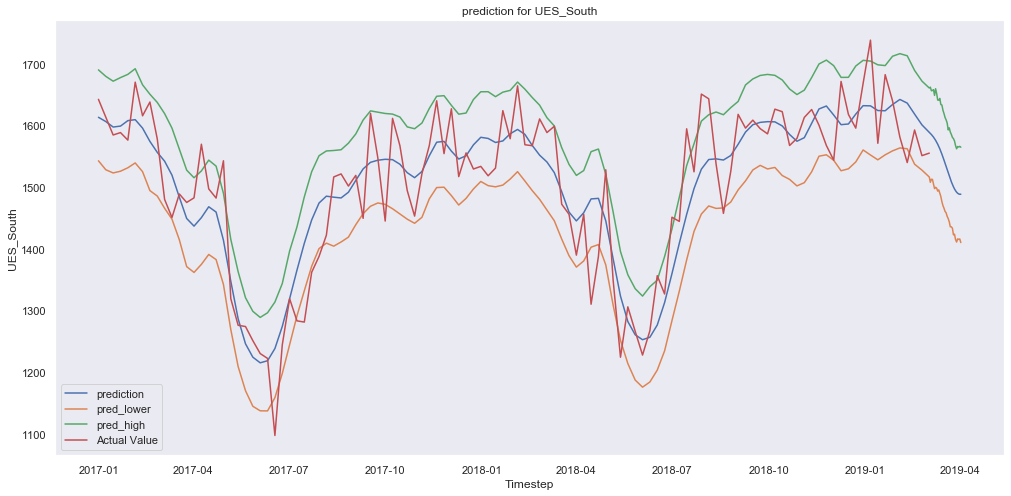

In [227]:
# Merge all code in a single run

#resample to weekly data
resample_weekly(UES_dayahead_price)

#plot weekly_data
plot_data(weekly_data)

#split dataset into single data in a list
single_data(weekly_data) 

#split each data in test_train and predict
split_train_predict(lst)

#plot Prediction
for item, cols in zip(pred_lst, weekly_data):
    model.plot(item)
    plt.title(f"Prediction plot for {cols}")
    

#plot forcast components
for items, cols in zip(pred_lst, weekly_data):
    model.plot_components(items)
    plt.title(f"Prediction plot for {cols}")
    
    
#evaluate data
eval_data = list(map(lambda X: evaluate(X[0],X[1]), list(zip(lst,pred_lst))))
eval_data

#calc prediction error
for it in eval_data:
    pred_error = pred_errors(it, pred_size)
    print(pred_error)

# Plot forecast with upper and lower bounds
for data, col in zip(eval_data, weekly_data):      
    plt.figure(figsize=(17, 8))
    plt.plot(data['yhat'], label = "prediction")
    plt.plot(data['yhat_lower'], label = "pred_lower")
    plt.plot(data['yhat_upper'], label = "pred_high")
    plt.plot(data['y'], label = "Actual Value")
    plt.xlabel('Timestep')
    plt.ylabel(col)
    plt.title(f"prediction for {col}")
    plt.grid(False)
    plt.legend()
    plt.show()

### Prediction for `PZ_dayahead_price_volume`

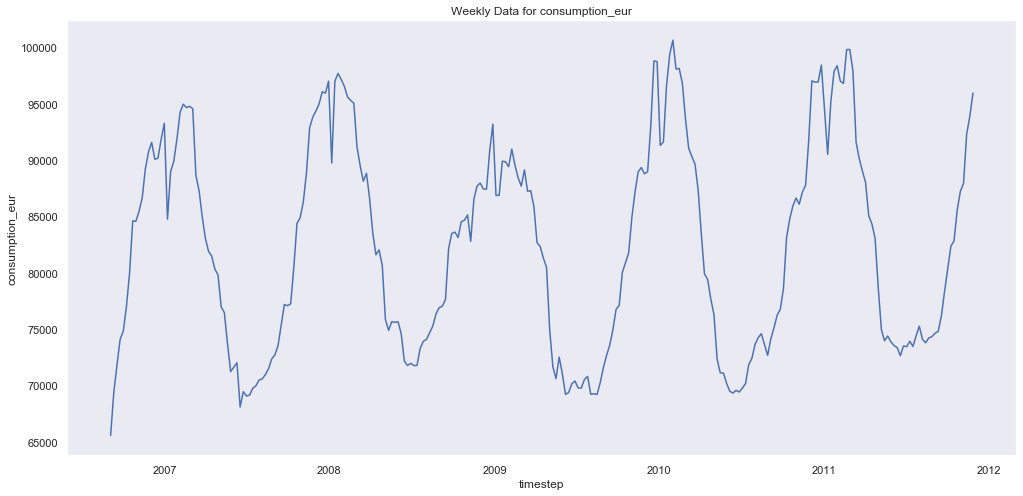

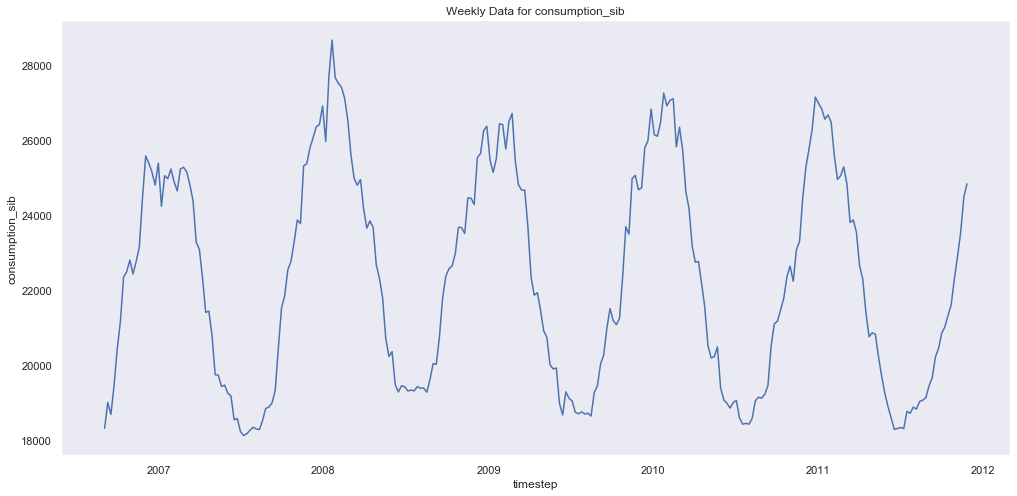

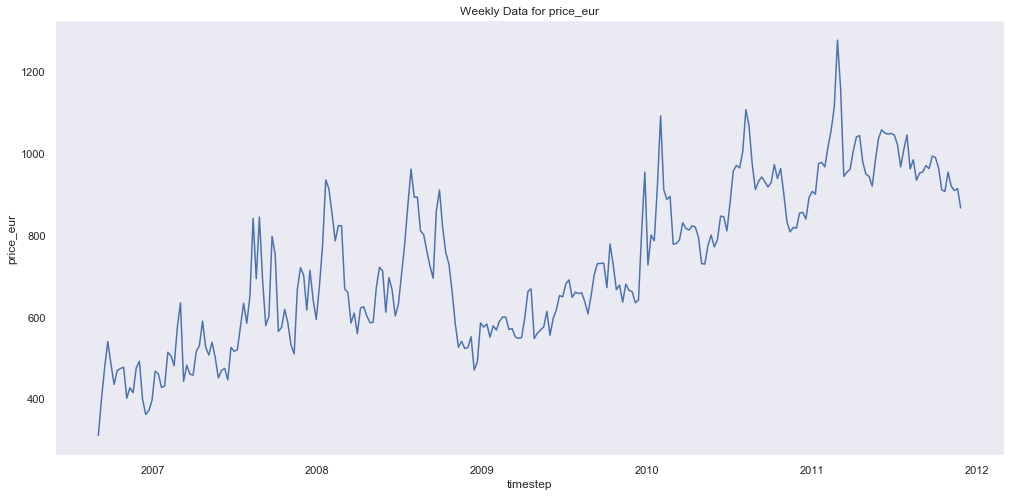

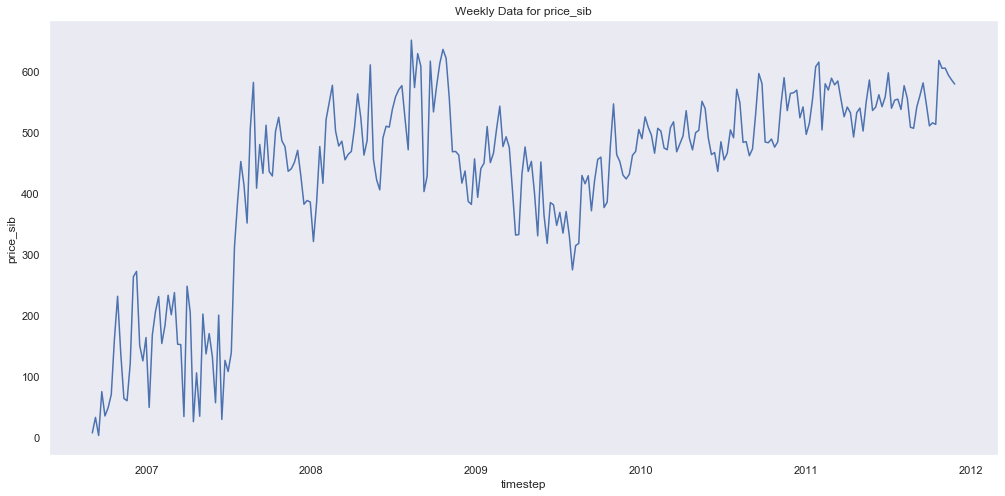

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


{'MAPE': 2.7117297220561154, 'MAE': 2016.7395793292344}
{'MAPE': 1.4422174444447147, 'MAE': 293.77346227610633}
{'MAPE': 4.030432028518424, 'MAE': 38.281688513896995}
{'MAPE': 8.800606666133913, 'MAE': 48.792216873115635}


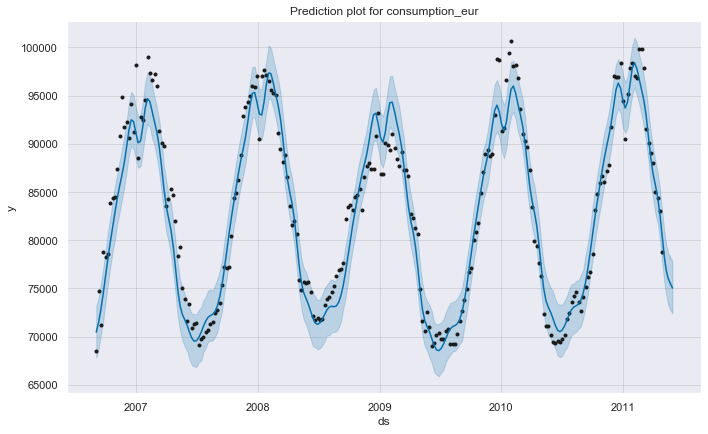

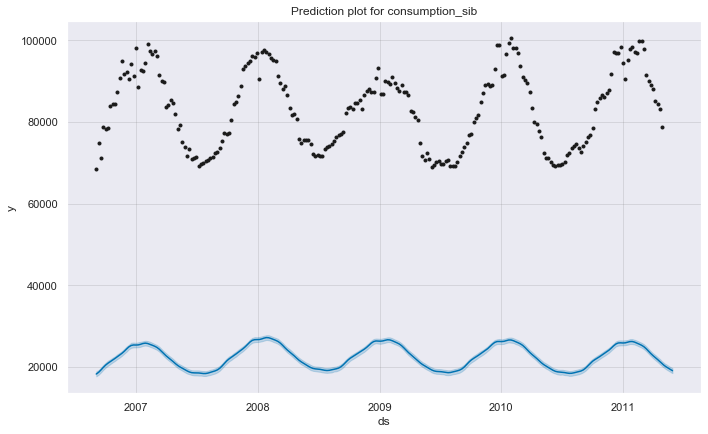

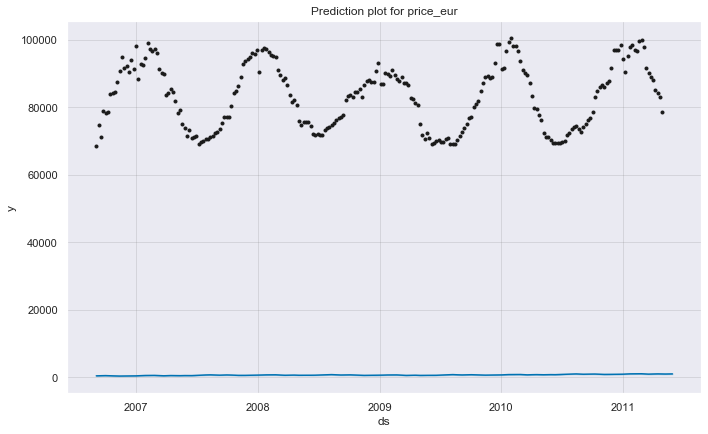

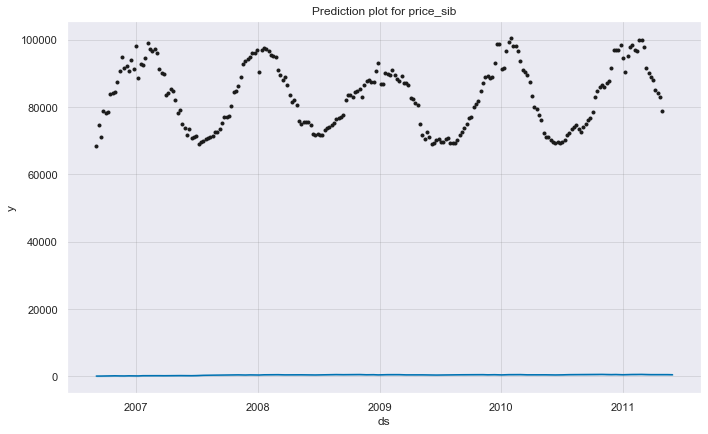

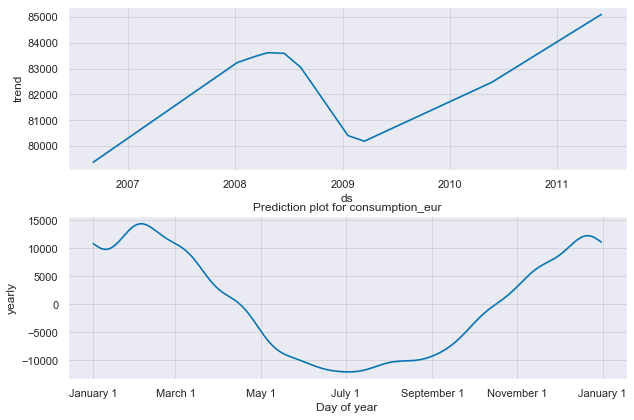

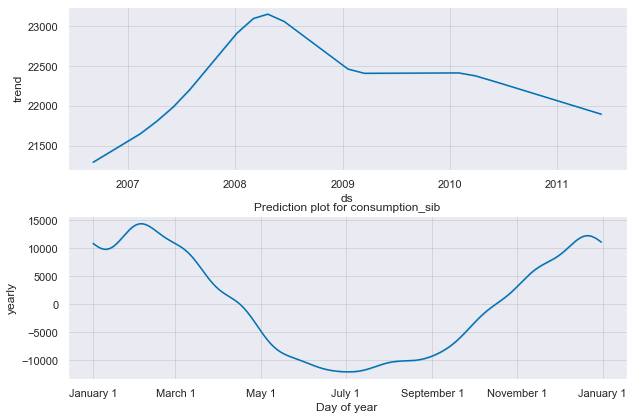

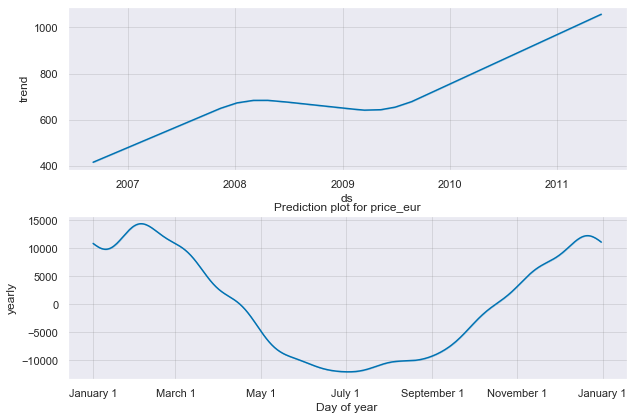

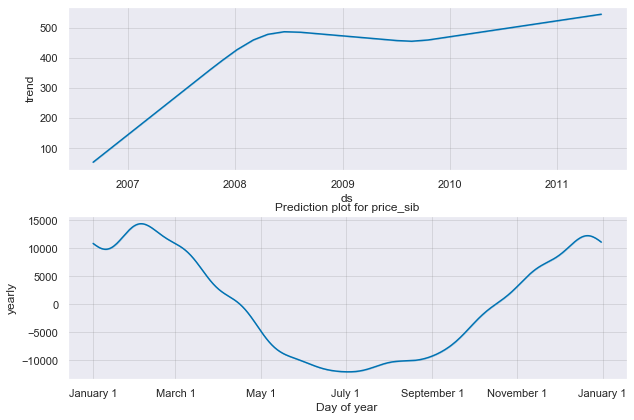

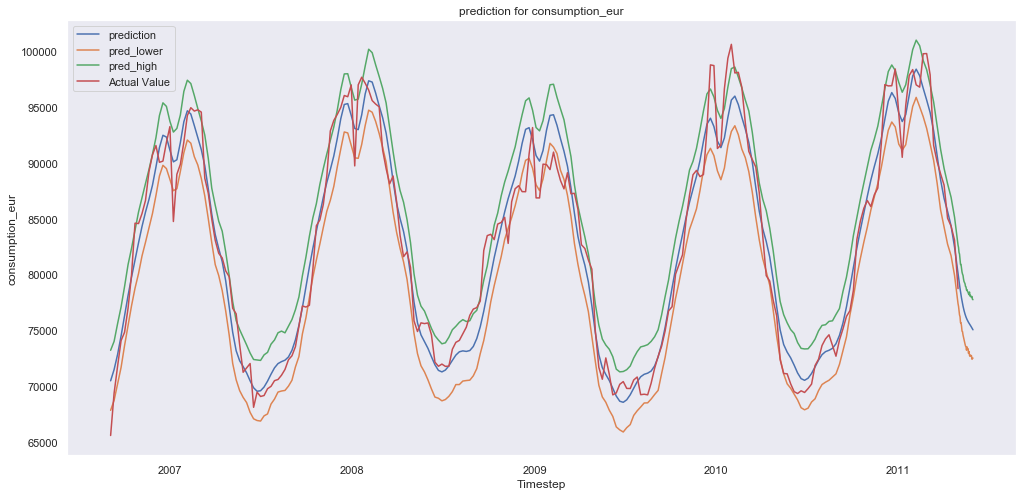

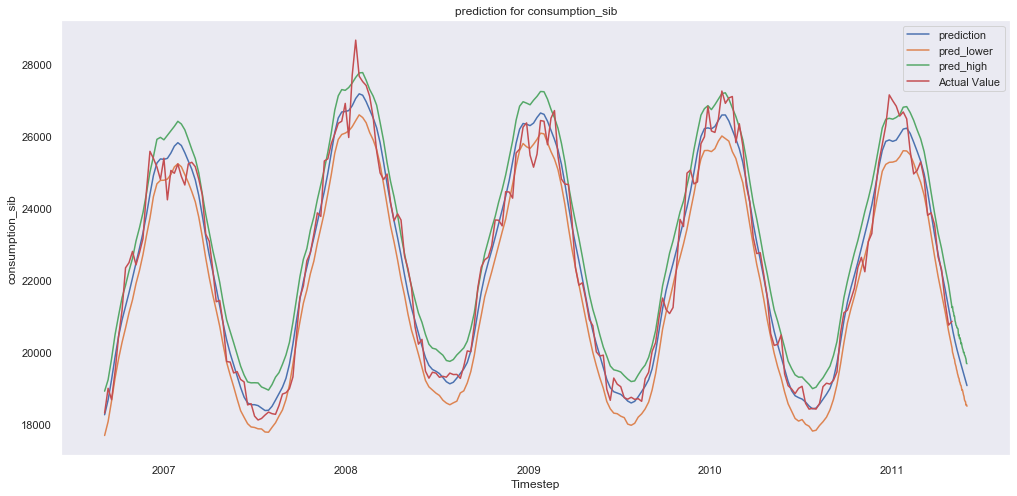

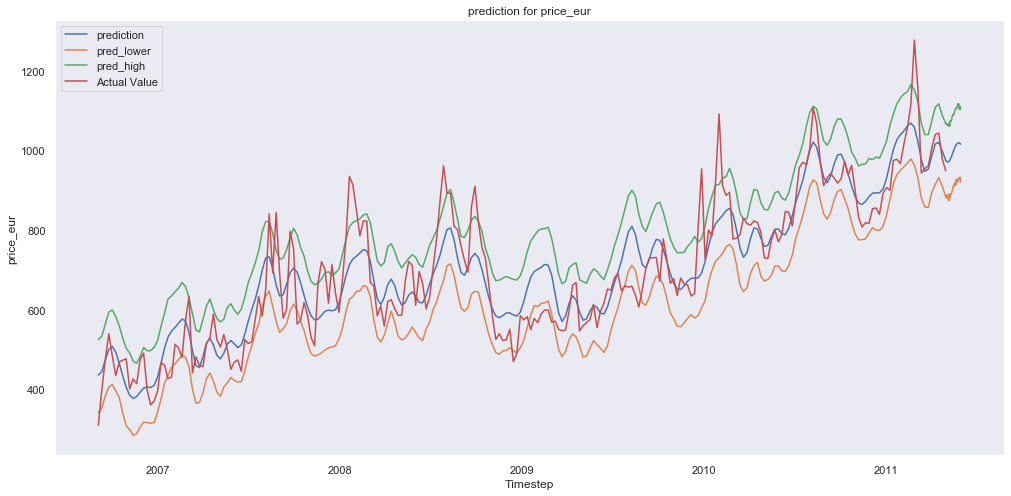

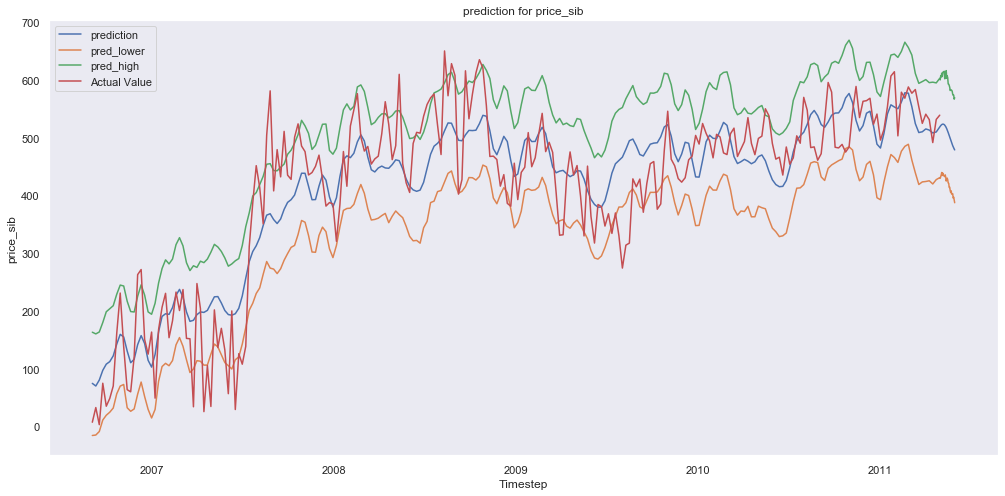

In [228]:
# Merge all code in a single run

#resample to weekly data
resample_weekly(PZ_dayahead_price_volume)

#plot weekly_data
plot_data(weekly_data)

#split dataset into single data in a list
single_data(weekly_data) 

#split each data in test_train and predict
split_train_predict(lst)

#plot Prediction
for item, cols in zip(pred_lst, weekly_data):
    model.plot(item)
    plt.title(f"Prediction plot for {cols}")
    

#plot forcast components
for items, cols in zip(pred_lst, weekly_data):
    model.plot_components(items)
    plt.title(f"Prediction plot for {cols}")
    
    
#evaluate data
eval_data = list(map(lambda X: evaluate(X[0],X[1]), list(zip(lst,pred_lst))))
eval_data

#calc prediction error
for it in eval_data:
    pred_error = pred_errors(it, pred_size)
    print(pred_error)

# Plot forecast with upper and lower bounds
for data, col in zip(eval_data, weekly_data):      
    plt.figure(figsize=(17, 8))
    plt.plot(data['yhat'], label = "prediction")
    plt.plot(data['yhat_lower'], label = "pred_lower")
    plt.plot(data['yhat_upper'], label = "pred_high")
    plt.plot(data['y'], label = "Actual Value")
    plt.xlabel('Timestep')
    plt.ylabel(col)
    plt.title(f"prediction for {col}")
    plt.grid(False)
    plt.legend()
    plt.show()